### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

### Loading Data

In [4]:
combined_df = pd.read_csv('combined_df_2.csv', index_col='Date', parse_dates=True)


In [5]:
combined_df = combined_df[combined_df.index >= "2015-01-01"]


In [6]:
returns_df = pd.read_csv('returns_df.csv', index_col='Date', parse_dates=True)

In [7]:
returns_df = returns_df[returns_df.index >= "2015-01-01"]


In [8]:
returns_df = returns_df.rename(columns=lambda x: f"{x}_return")


In [9]:
returns_df.shape

(2516, 503)

In [10]:
combined_df.shape

(2555, 36216)

In [11]:
returns_df.tail()

,MMM_return,AOS_return,ABT_return,ABBV_return,ACN_return,ADBE_return,AMD_return,AES_return,AFL_return,A_return,...,WMB_return,WTW_return,WDAY_return,WYNN_return,XEL_return,XYL_return,YUM_return,ZBRA_return,ZBH_return,ZTS_return
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-24,0.010699,0.004813,0.003937,0.009025,0.007972,0.002686,0.013563,-0.003063,0.004867,0.011144,...,0.010176,0.005248,0.013753,0.007604,0.007236,0.005446,0.008516,0.012262,0.004494,0.002557
2024-12-26,0.006290,0.000000,0.004444,-0.004444,-0.003318,0.004956,-0.009740,-0.013825,0.004068,-0.001984,...,-0.011722,0.005822,0.001264,0.005970,-0.000440,0.002708,0.007407,0.003566,-0.000466,0.004979
2024-12-27,-0.007623,-0.006677,-0.002429,-0.006641,-0.011791,-0.008175,0.001040,-0.007009,-0.002701,-0.002135,...,-0.000371,-0.004908,-0.011656,-0.007054,-0.000587,-0.007935,-0.005662,-0.019604,-0.003543,-0.005558
2024-12-30,-0.008066,-0.005992,-0.019045,-0.010168,-0.010360,-0.001523,-0.021967,-0.007843,-0.003966,-0.008263,...,0.004079,-0.009706,-0.015925,-0.032138,-0.008072,-0.010636,-0.012645,-0.013417,-0.011535,-0.014338
2024-12-31,-0.000310,0.002793,0.002748,0.008513,-0.001986,-0.002512,-0.013476,0.017391,0.004564,0.001252,...,-0.000739,0.002817,-0.015153,0.003845,-0.001036,-0.002236,0.004793,0.006174,0.002182,0.004253


In [12]:
combined_df = combined_df[combined_df.index < "2025-01-01"]

combined_df.tail()

,MMM_ao,AOS_ao,ABT_ao,ABBV_ao,ACN_ao,ADBE_ao,AMD_ao,AES_ao,AFL_ao,A_ao,...,WMB_ui,WTW_ui,WDAY_ui,WYNN_ui,XEL_ui,XYL_ui,YUM_ui,ZBRA_ui,ZBH_ui,ZTS_ui
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-24,-2.399567,-3.820430,-2.323542,-1.741489,2.281708,-56.547618,-12.875148,-0.583508,-5.820610,-1.400766,...,6.899985,5.895753,2.947147,5.256480,5.786063,6.774773,3.137876,3.668459,4.017929,4.920949
2024-12-26,-1.784580,-3.877552,-1.861937,-0.084935,3.573034,-54.978855,-11.946382,-0.528064,-5.395596,-1.219396,...,6.897357,5.905099,3.024505,5.549995,5.767658,7.121271,3.188517,3.758604,3.950233,5.275498
2024-12-27,-1.013852,-3.757279,-1.254038,1.825783,1.062798,-52.797560,-10.589205,-0.434663,-4.837866,-0.628048,...,6.791635,5.852059,3.272948,5.886013,5.662142,7.514386,3.262140,4.021489,3.822941,5.678577
2024-12-30,-0.709574,-3.715989,-1.230866,3.066608,-1.752025,-50.914855,-9.158588,-0.445897,-4.536587,-0.550895,...,6.412179,5.633254,3.629968,6.447811,5.520272,7.936797,3.408185,4.313126,3.832192,6.196227
2024-12-31,-0.416498,-3.552349,-1.229579,3.077886,-2.934292,-49.651061,-8.738381,-0.434866,-4.151971,-0.290230,...,5.989492,5.275813,4.029875,6.922050,5.357932,8.093736,3.512017,4.487849,3.768492,6.629994


### Reformating Data

In [14]:
############################
#  A. Parse signals_df columns
############################
new_cols_signals = []
for c in combined_df.columns:
    # Each column is like "AAPL_ao", "AAPL_rsi", etc.
    ticker, indicator = c.split('_', 1)
    new_cols_signals.append((ticker, indicator))

# Create a MultiIndex with levels = [ticker, indicator]
combined_df.columns = pd.MultiIndex.from_tuples(new_cols_signals, 
                                               names=['ticker', 'indicator'])

In [15]:

############################
#  B. Parse returns_df columns
############################
new_cols_returns = []
for c in returns_df.columns:
    # Each column is like "AAPL_return", "MSFT_return", etc.
    ticker, ret_label = c.split('_', 1)
    # We'll store (ticker, 'return') so it's consistent
    new_cols_returns.append((ticker, 'return'))

returns_df.columns = pd.MultiIndex.from_tuples(new_cols_returns, 
                                               names=['ticker', 'field'])

In [16]:
signals_long = combined_df.stack(level='ticker')
# signals_long now has an index of (date, ticker)
# and columns labeled by the 'indicator' level (e.g., 'ao', 'rsi', etc.).
signals_long.index = signals_long.index.set_names(["date", "ticker"])
returns_long = returns_df.stack(level='ticker')
# returns_long now has index = (date, ticker)
# columns = ['return'] (the second level was 'field' = 'return').
returns_long.index = returns_long.index.set_names(["date", "ticker"])
df_merged = signals_long.join(returns_long, how="inner")
# df_merged columns will be [all indicators, 'return'].


C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_2388\305111948.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  signals_long = combined_df.stack(level='ticker')
C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_2388\305111948.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  returns_long = returns_df.stack(level='ticker')


In [17]:


############################
#  C. Improved data preparation
############################
# First, handle missing data in combined_df
# Fill NaN values with column means for each ticker
combined_df_filled = combined_df.groupby(level='ticker', axis=1).transform(
    lambda x: x.fillna(x.mean())
)

# Fill any remaining NaNs with 0 (for columns that are all NaN for a ticker)
combined_df_filled = combined_df_filled.fillna(0)

# Now stack the data
signals_long = combined_df_filled.stack(level='ticker')
signals_long.index = signals_long.index.set_names(["date", "ticker"])

# For returns_df, we'll be more conservative and only fill within each ticker
# First create a DataFrame with the same structure as returns_df
returns_df_filled = returns_df.copy()

# Fill forward and then backward within each ticker to handle missing days
for ticker in returns_df.columns.get_level_values('ticker').unique():
    ticker_cols = [col for col in returns_df.columns if col[0] == ticker]
    returns_df_filled[ticker_cols] = returns_df[ticker_cols].fillna(method='ffill').fillna(method='bfill')

# Stack the returns data
returns_long = returns_df_filled.stack(level='ticker')
returns_long.index = returns_long.index.set_names(["date", "ticker"])

# Join the dataframes
df_merged = signals_long.join(returns_long, how="inner")

# Print shape information for debugging
print(f"After preprocessing and joining:")
print(f"signals_long shape: {signals_long.shape}")
print(f"returns_long shape: {returns_long.shape}")
print(f"df_merged shape: {df_merged.shape}")

C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_2388\600520072.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_df_filled = combined_df.groupby(level='ticker', axis=1).transform(
C:\Users\PushkarJain\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_2388\600520072.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  signals_long = combined_df_filled.stack(level='ticker')
C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_2388\600520072.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future versio

After preprocessing and joining:
signals_long shape: (1265548, 72)
returns_long shape: (1263032, 1)
df_merged shape: (1263032, 73)


In [18]:
market_returns = pd.read_csv('market_returns.csv', index_col='Date', parse_dates=True)
market_returns = market_returns[market_returns.index >= "2015-01-01"]
market_returns = market_returns[market_returns.index < "2025-01-01"]



In [19]:
market_returns = market_returns.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
market_returns.head()

,Market_Returns
Date,
2015-01-02,-0.000340
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888


In [20]:
market_returns.columns

Index(['Market_Returns'], dtype='object')

## Portfolio Construction: Volatility targeting Ranking

In [96]:
def calculate_beta_and_alpha(strategy_returns, market_returns, risk_free_rate=0.02/252):
    """
    Calculate beta and Jensen's alpha for a strategy.
    
    Parameters:
    strategy_returns: Series with strategy returns
    market_returns: Series with market returns
    risk_free_rate: Daily risk-free rate (default: 2% annual / 252 trading days)
    
    Returns:
    Dictionary with beta and alpha values
    """
    # Filter out NaN values and ensure same dates for both series
    common_idx = strategy_returns.index.intersection(market_returns.index)
    strategy_returns = strategy_returns.loc[common_idx]
    market_returns = market_returns.loc[common_idx]
    
    # Calculate excess returns
    excess_strategy = strategy_returns - risk_free_rate
    excess_market = market_returns - risk_free_rate
    
    # Calculate beta using covariance and variance
    beta = np.cov(excess_strategy, excess_market)[0, 1] / np.var(excess_market)
    
    # Calculate Jensen's alpha using CAPM formula
    # α = r_i - [r_f + β(r_m - r_f)]
    expected_return = risk_free_rate + beta * (market_returns.mean() - risk_free_rate)
    alpha = strategy_returns.mean() - expected_return
    
    # Annualize alpha (assuming daily returns)
    alpha_annual = alpha * 252
    
    return {
        'beta': beta,
        'alpha': alpha_annual
    }

def calculate_alternative_alpha(strategy_returns, market_returns, beta, risk_free_rate=0.02/252):
    """
    Calculate alpha using the formula: α_i = r_i - β_i,bm * r_bm - (1 - β_i,bm) * rf
    
    Parameters:
    strategy_returns: Series with strategy returns
    market_returns: Series with market returns
    beta: Beta of the strategy relative to the market
    risk_free_rate: Daily risk-free rate (default: 2% annual / 252 trading days)
    
    Returns:
    Annualized alpha value
    """
    # Calculate alpha using the provided formula
    alpha = strategy_returns.mean() - (beta * market_returns.mean() + (1 - beta) * risk_free_rate)
    
    # Annualize alpha (assuming daily returns)
    alpha_annual = alpha * 252
    
    return alpha_annual

def backtest_enhanced_volatility_targeting(combined_df, returns_df, market_returns_df, 
                                         signal_name, n_stocks=5, rebalance_freq='M',
                                         target_volatility=0.15, volatility_window=42,
                                         min_periods=20, max_leverage=3.0, 
                                         min_leverage=0.5, long_leverage=2.0, 
                                         short_leverage=2.0, signal_threshold=None):
    """
    Backtest an enhanced portfolio strategy with volatility targeting.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)
    market_returns_df: DataFrame with market returns
    signal_name: Name of the signal to use for ranking
    n_stocks: Number of top/bottom stocks to include in the portfolio
    rebalance_freq: Rebalancing frequency ('M' for monthly, 'W' for weekly)
    target_volatility: Target portfolio volatility (annualized)
    volatility_window: Window size for volatility calculation
    min_periods: Minimum number of observations required for volatility calculation
    max_leverage: Maximum allowed leverage for any single position
    min_leverage: Minimum allowed leverage for any single position
    long_leverage: Base leverage for long positions
    short_leverage: Base leverage for short positions
    signal_threshold: Optional threshold for signal strength
    
    Returns:
    Dictionary with portfolio returns and performance metrics
    """
    print(f"Backtesting enhanced volatility targeting portfolio for signal: {signal_name}")
    
    # Get unique tickers that have this signal
    available_tickers = []
    for ticker in combined_df.columns.get_level_values('ticker').unique():
        try:
            # Check if this ticker has the signal
            combined_df.xs((ticker, signal_name), axis=1)
            available_tickers.append(ticker)
        except:
            continue
    
    print(f"Found {len(available_tickers)} tickers with signal {signal_name}")
    
    # Create a pivoted dataframe for this signal
    signal_values = pd.DataFrame()
    
    for ticker in available_tickers:
        try:
            # Extract signal values for this ticker
            ticker_signal = combined_df.xs((ticker, signal_name), axis=1)
            signal_values[ticker] = ticker_signal
        except Exception as e:
            continue
    
    # Create a pivoted dataframe for returns
    stock_returns = pd.DataFrame()
    
    for ticker in available_tickers:
        try:
            # Extract returns for this ticker
            ticker_returns = returns_df.xs(ticker, axis=1, level='ticker')
            stock_returns[ticker] = ticker_returns.iloc[:, 0]
        except Exception as e:
            continue
    
    # Get tickers that have both signals and returns
    common_tickers = list(set(signal_values.columns) & set(stock_returns.columns))
    print(f"Found {len(common_tickers)} tickers with both signal and returns data")
    
    # Keep only tickers with both signal and returns
    signal_values = signal_values[common_tickers]
    stock_returns = stock_returns[common_tickers]
    
    # Calculate rolling volatility for each stock with enhanced handling
    print("Calculating rolling volatility...")
    volatility_df = calculate_rolling_volatility(stock_returns, window=volatility_window, min_periods=min_periods)
    
    # Calculate market volatility (for normalization)
    market_returns = market_returns_df['Market_Returns']
    market_volatility = market_returns.rolling(window=volatility_window, min_periods=min_periods).std() * np.sqrt(252)
    market_volatility = market_volatility.fillna(method='ffill')
    
    # Relative volatility (stock vol / market vol) - useful for filtering extreme stocks
    relative_volatility = pd.DataFrame(index=volatility_df.index)
    for ticker in volatility_df.columns:
        relative_volatility[ticker] = volatility_df[ticker] / market_volatility
    
    # Define rebalancing dates based on frequency
    if rebalance_freq == 'M':
        rebalance_dates = pd.date_range(start=signal_values.index[0], 
                                        end=signal_values.index[-1], 
                                        freq='M')
    elif rebalance_freq == 'W':
        rebalance_dates = pd.date_range(start=signal_values.index[0], 
                                        end=signal_values.index[-1], 
                                        freq='W-FRI')
    else:
        raise ValueError("Rebalance frequency must be 'M' or 'W'")
    
    # Filter to dates that exist in our data
    rebalance_dates = [date for date in rebalance_dates if date in signal_values.index]
    
    # Skip first few rebalance dates if we don't have enough data for volatility calculation
    start_idx = volatility_window // 20  # Rough estimate to ensure we have volatility data
    if start_idx >= len(rebalance_dates):
        start_idx = 0
    
    # Initialize portfolio returns
    portfolio_returns = pd.Series(index=stock_returns.index, dtype=float)
    
    # Keep track of positions for analysis
    positions_history = {}
    
    # For each rebalancing date
    for i, rebalance_date in enumerate(rebalance_dates[start_idx:]):
        i = i + start_idx  # Adjust index for the actual rebalance_dates list
        
        if i == len(rebalance_dates) - 1:
            # Skip the last rebalance date (no future returns to calculate)
            continue
            
        next_rebalance_date = rebalance_dates[i + 1]
        
        # Get signal values for current rebalance date
        current_signals = signal_values.loc[rebalance_date].dropna()
        
        # If signal threshold is provided, filter signals
        if signal_threshold is not None:
            # For long positions, keep only stocks with signal > threshold
            top_signals = current_signals[current_signals > signal_threshold]
            
            # For short positions, keep only stocks with signal < -threshold
            bottom_signals = current_signals[current_signals < -signal_threshold]
            
            # If not enough stocks, use top/bottom n
            if len(top_signals) < n_stocks or len(bottom_signals) < n_stocks:
                # Rank stocks by signal value
                ranked_stocks = current_signals.sort_values(ascending=False)
                
                # Get top and bottom n stocks
                top_stocks = ranked_stocks.index[:n_stocks]
                bottom_stocks = ranked_stocks.index[-n_stocks:]
            else:
                # Use the thresholded stocks
                top_stocks = top_signals.index
                bottom_stocks = bottom_signals.index
        else:
            # If not enough signals, skip this period
            if len(current_signals) < 2 * n_stocks:
                continue
                
            # Rank stocks by signal value
            ranked_stocks = current_signals.sort_values(ascending=False)
            
            # Get top and bottom n stocks
            top_stocks = ranked_stocks.index[:n_stocks]
            bottom_stocks = ranked_stocks.index[-n_stocks:]
        
        # Get current volatility for selected stocks
        current_volatility = volatility_df.loc[rebalance_date]
        current_rel_vol = relative_volatility.loc[rebalance_date]
        
        # Filter out extremely volatile stocks (relative to market)
        max_rel_vol = 2.5  # Stocks more than 2.5x market volatility will be excluded
        
        filtered_top_stocks = [ticker for ticker in top_stocks 
                              if ticker in current_rel_vol.index and 
                              current_rel_vol[ticker] <= max_rel_vol]
        
        filtered_bottom_stocks = [ticker for ticker in bottom_stocks 
                                if ticker in current_rel_vol.index and 
                                current_rel_vol[ticker] <= max_rel_vol]
        
        # If too many stocks filtered out, revert to original selection
        if len(filtered_top_stocks) < min(2, len(top_stocks)):
            filtered_top_stocks = list(top_stocks)
        if len(filtered_bottom_stocks) < min(2, len(bottom_stocks)):
            filtered_bottom_stocks = list(bottom_stocks)
        
        # Update stocks lists with filtered versions
        top_stocks = filtered_top_stocks
        bottom_stocks = filtered_bottom_stocks
        
        # Calculate volatility scaling factor for each stock
        # Higher volatility -> lower position size, and vice versa
        scaling_factors = {}
        
        for ticker in list(top_stocks) + list(bottom_stocks):
            if ticker in current_volatility.index and not np.isnan(current_volatility[ticker]) and current_volatility[ticker] > 0:
                # Calculate scaling factor
                scaling_factor = target_volatility / current_volatility[ticker]
                
                # Apply limits to scaling factor
                scaling_factor = min(max(scaling_factor, min_leverage), max_leverage)
                
                scaling_factors[ticker] = scaling_factor
            else:
                # Default to 1.0 if volatility is not available
                scaling_factors[ticker] = 1.0
        
        # Get returns for portfolio stocks during this period
        period_mask = (stock_returns.index > rebalance_date) & (stock_returns.index <= next_rebalance_date)
        period_returns = stock_returns.loc[period_mask]
        
        # Skip if no returns in this period
        if period_returns.empty:
            continue
        
        # Store positions for this rebalancing period
        positions = {
            'date': rebalance_date,
            'long_stocks': list(top_stocks),
            'short_stocks': list(bottom_stocks),
            'long_scaling': {t: scaling_factors.get(t, 1.0) for t in top_stocks},
            'short_scaling': {t: scaling_factors.get(t, 1.0) for t in bottom_stocks}
        }
        positions_history[rebalance_date] = positions
            
        # Calculate portfolio returns with enhanced volatility targeting
        for date in period_returns.index:
            date_returns = period_returns.loc[date]
            
            # Long returns (volatility-weighted)
            top_weighted_returns = 0
            total_long_weight = 0
            
            for ticker in top_stocks:
                if ticker in date_returns.index and not np.isnan(date_returns[ticker]):
                    weight = scaling_factors.get(ticker, 1.0) * long_leverage
                    top_weighted_returns += date_returns[ticker] * weight
                    total_long_weight += weight
            
            if total_long_weight > 0:
                top_returns = top_weighted_returns / total_long_weight
            else:
                top_returns = 0
                
            # Short returns (volatility-weighted)
            bottom_weighted_returns = 0
            total_short_weight = 0
            
            for ticker in bottom_stocks:
                if ticker in date_returns.index and not np.isnan(date_returns[ticker]):
                    weight = scaling_factors.get(ticker, 1.0) * short_leverage
                    bottom_weighted_returns += -date_returns[ticker] * weight  # Negative for short
                    total_short_weight += weight
            
            if total_short_weight > 0:
                bottom_returns = bottom_weighted_returns / total_short_weight
            else:
                bottom_returns = 0
                
            # Combined long-short returns
            portfolio_returns.loc[date] = (top_returns + bottom_returns) / 2
    
    # Fill NaN values in portfolio returns with 0
    portfolio_returns = portfolio_returns.fillna(0)
    
    # Calculate cumulative returns
    portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
    
    # Get market returns for the same period
    market_returns = market_returns_df.loc[portfolio_returns.index]
    market_cumulative_returns = (1 + market_returns['Market_Returns']).cumprod()
    
    # Calculate beta using a rolling window (e.g., 252 trading days ~ 1 year)
    rolling_window = 252
    # Initialize a Series to store rolling beta values
    rolling_beta = pd.Series(index=portfolio_returns.index)
    
    # Calculate rolling beta
    for i in range(rolling_window, len(portfolio_returns)):
        window_start = i - rolling_window
        window_end = i
        
        strategy_window = portfolio_returns.iloc[window_start:window_end]
        market_window = market_returns['Market_Returns'].iloc[window_start:window_end]
        
        # Calculate beta for this window
        if len(strategy_window) > 0 and len(market_window) > 0:
            cov = np.cov(strategy_window, market_window)[0, 1]
            var = np.var(market_window)
            
            if var > 0:
                rolling_beta.iloc[i] = cov / var
    
    # Calculate overall beta and alpha
    risk_free_rate = 0.02/252  # Daily risk-free rate (2% annual)
    
    # Calculate Jensen's alpha (CAPM-based)
    jensens_metrics = calculate_beta_and_alpha(portfolio_returns, market_returns['Market_Returns'], risk_free_rate)
    beta = jensens_metrics['beta']
    jensens_alpha = jensens_metrics['alpha']
    
    # Calculate alternative alpha using the provided formula
    alt_alpha = calculate_alternative_alpha(portfolio_returns, market_returns['Market_Returns'], beta, risk_free_rate)
    
    # Calculate performance metrics
    portfolio_metrics = calculate_performance_metrics(portfolio_returns)
    market_metrics = calculate_performance_metrics(market_returns['Market_Returns'])
    
    # Add beta and alpha values to metrics
    portfolio_metrics['Beta'] = beta
    portfolio_metrics['Jensen Alpha'] = jensens_alpha
    portfolio_metrics['Alternative Alpha'] = alt_alpha
    
    # Calculate Information Ratio
    excess_returns = portfolio_returns - market_returns['Market_Returns']
    if np.std(excess_returns) > 0:
        information_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)
    else:
        information_ratio = 0
    portfolio_metrics['Information Ratio'] = information_ratio
    
    # Return results
    results = {
        'signal': signal_name,
        'portfolio_returns': portfolio_returns,
        'portfolio_cumulative_returns': portfolio_cumulative_returns,
        'market_returns': market_returns['Market_Returns'],
        'market_cumulative_returns': market_cumulative_returns,
        'portfolio_metrics': portfolio_metrics,
        'market_metrics': market_metrics,
        'positions_history': positions_history,
        'rolling_beta': rolling_beta
    }
    
    return results

def backtest_multiple_enhanced_strategies(combined_df, returns_df, market_returns_df, 
                                        signals_list, n_stocks=5, rebalance_freq='M',
                                        target_volatility=0.15, volatility_window=42,
                                        min_periods=20, max_leverage=3.0, min_leverage=0.5,
                                        long_leverage=2.0, short_leverage=2.0, 
                                        signal_threshold=None):
    """
    Backtest enhanced volatility targeting portfolios for multiple signals and compare performance.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)
    market_returns_df: DataFrame with market returns
    signals_list: List of signal names to test
    n_stocks: Number of top/bottom stocks to include in each portfolio
    rebalance_freq: Rebalancing frequency ('M' for monthly, 'W' for weekly)
    target_volatility: Target portfolio volatility (annualized)
    volatility_window: Window size for volatility calculation
    min_periods: Minimum number of observations required for volatility calculation
    max_leverage: Maximum allowed leverage for any single position
    min_leverage: Minimum allowed leverage for any single position
    long_leverage: Base leverage for long positions
    short_leverage: Base leverage for short positions
    signal_threshold: Optional threshold for signal strength
    
    Returns:
    Dictionary with results for all signals
    """
    # Initialize results storage
    all_results = {}
    metrics_summary = pd.DataFrame()
    
    # Backtest each signal
    for signal in signals_list:
        try:
            results = backtest_enhanced_volatility_targeting(
                combined_df, 
                returns_df, 
                market_returns_df, 
                signal, 
                n_stocks=n_stocks, 
                rebalance_freq=rebalance_freq,
                target_volatility=target_volatility,
                volatility_window=volatility_window,
                min_periods=min_periods,
                max_leverage=max_leverage,
                min_leverage=min_leverage,
                long_leverage=long_leverage,
                short_leverage=short_leverage,
                signal_threshold=signal_threshold
            )
            
            all_results[signal] = results
            
            # Add metrics to summary dataframe
            signal_metrics = pd.Series(results['portfolio_metrics'], name=signal)
            metrics_summary = pd.concat([metrics_summary, signal_metrics.to_frame().T])
            
            print(f"Completed enhanced volatility targeting backtest for {signal}")
        except Exception as e:
            print(f"Error backtesting {signal}: {e}")
    
    # Add market metrics to summary
    if all_results:
        market_metrics = pd.Series(all_results[list(all_results.keys())[0]]['market_metrics'], name='Market')
        metrics_summary = pd.concat([metrics_summary, market_metrics.to_frame().T])
    
    # Return all results
    return {
        'individual_results': all_results,
        'metrics_summary': metrics_summary
    }

def create_combined_enhanced_strategy(all_results, signals_list, 
                                    weighting_method='equal'):
    """
    Create a combined strategy from multiple enhanced volatility targeting signal portfolios.
    
    Parameters:
    all_results: Dictionary with results for all signals
    signals_list: List of signal names to include
    weighting_method: Method for weighting signals ('equal', 'sharpe', 'sortino', 'information')
    
    Returns:
    Dictionary with combined strategy results
    """
    print(f"Creating combined enhanced strategy using {weighting_method} weighting")
    
    # Get common date range for all portfolios
    common_dates = None
    
    for signal in signals_list:
        if signal not in all_results['individual_results']:
            continue
            
        signal_returns = all_results['individual_results'][signal]['portfolio_returns']
        
        if common_dates is None:
            common_dates = set(signal_returns.index)
        else:
            common_dates = common_dates.intersection(set(signal_returns.index))
    
    common_dates = sorted(list(common_dates))
    
    # Initialize combined returns
    combined_returns = pd.Series(0, index=common_dates)
    
    # Calculate weights based on selected method
    if weighting_method == 'equal':
        # Equal weighting for all signals
        weights = {signal: 1/len(signals_list) for signal in signals_list 
                  if signal in all_results['individual_results']}
    
    elif weighting_method == 'sharpe':
        # Weight by Sharpe Ratio
        metrics = all_results['metrics_summary']
        sharpe_values = metrics.loc[signals_list, 'Sharpe Ratio']
        
        # Handle negative Sharpe ratios by setting to small positive number
        sharpe_values = sharpe_values.apply(lambda x: max(x, 0.0001))
        
        total_sharpe = sharpe_values.sum()
        weights = {signal: sharpe_values[signal]/total_sharpe for signal in signals_list 
                  if signal in all_results['individual_results']}
                  
    elif weighting_method == 'sortino':
        # Weight by Sortino Ratio
        metrics = all_results['metrics_summary']
        sortino_values = metrics.loc[signals_list, 'Sortino Ratio']
        
        # Handle negative Sortino ratios by setting to small positive number
        sortino_values = sortino_values.apply(lambda x: max(x, 0.0001))
        
        total_sortino = sortino_values.sum()
        weights = {signal: sortino_values[signal]/total_sortino for signal in signals_list 
                  if signal in all_results['individual_results']}
    
    elif weighting_method == 'information':
        # Weight by Information Ratio
        metrics = all_results['metrics_summary']
        ir_values = metrics.loc[signals_list, 'Information Ratio']
        
        # Handle negative IRs by setting to small positive number
        ir_values = ir_values.apply(lambda x: max(x, 0.0001))
        
        total_ir = ir_values.sum()
        weights = {signal: ir_values[signal]/total_ir for signal in signals_list 
                  if signal in all_results['individual_results']}
    
    # Apply weights to each signal's returns
    for signal, weight in weights.items():
        signal_returns = all_results['individual_results'][signal]['portfolio_returns']
        signal_returns = signal_returns.reindex(common_dates)
        combined_returns += signal_returns * weight
    
    # Calculate cumulative returns
    combined_cumulative_returns = (1 + combined_returns).cumprod()
    
    # Get market returns for the same period
    market_returns = all_results['individual_results'][list(all_results['individual_results'].keys())[0]]['market_returns']
    market_returns = market_returns.reindex(common_dates)
    market_cumulative_returns = (1 + market_returns).cumprod()
    
    # Calculate beta and alpha for combined strategy
    risk_free_rate = 0.02/252  # Daily risk-free rate (2% annual)
    combined_metrics = calculate_beta_and_alpha(combined_returns, market_returns, risk_free_rate)
    beta = combined_metrics['beta']
    
    # Calculate rolling beta for the combined strategy
    rolling_window = 252  # 1 year rolling window
    rolling_beta = pd.Series(index=combined_returns.index)
    
    for i in range(rolling_window, len(combined_returns)):
        window_start = i - rolling_window
        window_end = i
        
        strategy_window = combined_returns.iloc[window_start:window_end]
        market_window = market_returns.iloc[window_start:window_end]
        
        # Calculate beta for this window
        if len(strategy_window) > 0 and len(market_window) > 0:
            cov = np.cov(strategy_window, market_window)[0, 1]
            var = np.var(market_window)
            
            if var > 0:
                rolling_beta.iloc[i] = cov / var
    
    # Calculate performance metrics
    combined_metrics = calculate_performance_metrics(combined_returns)
    
    # Add beta and alpha to metrics
    combined_metrics['Beta'] = beta
    combined_metrics['Jensen Alpha'] = calculate_beta_and_alpha(combined_returns, market_returns, risk_free_rate)['alpha']
    combined_metrics['Alternative Alpha'] = calculate_alternative_alpha(combined_returns, market_returns, beta, risk_free_rate)
    
    # Calculate Information Ratio
    excess_returns = combined_returns - market_returns
    if np.std(excess_returns) > 0:
        information_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)
    else:
        information_ratio = 0
    combined_metrics['Information Ratio'] = information_ratio
    
    # Return results
    combined_results = {
        'combined_returns': combined_returns,
        'combined_cumulative_returns': combined_cumulative_returns,
        'market_returns': market_returns,
        'market_cumulative_returns': market_cumulative_returns,
        'combined_metrics': combined_metrics,
        'weights': weights,
        'rolling_beta': rolling_beta
    }
    
    return combined_results

def plot_beta_comparison(backtest_results, combined_strategy=None, 
                       save_path="beta_comparison.png"):
    """
    Plot beta comparison for different strategies.
    
    Parameters:
    backtest_results: Results from backtest_multiple_enhanced_strategies
    combined_strategy: Optional results from combined strategy
    save_path: Path to save the figure
    """
    plt.figure(figsize=(12, 8))
    
    # Plot beta for individual strategies
    for signal, results in backtest_results['individual_results'].items():
        if 'Beta' in results['portfolio_metrics']:
            plt.axhline(y=results['portfolio_metrics']['Beta'], 
                       linestyle='--', 
                       alpha=0.7,
                       label=f"{signal} (β = {results['portfolio_metrics']['Beta']:.2f})")
    
    # Plot beta for combined strategy if provided
    if combined_strategy is not None and 'Beta' in combined_strategy['combined_metrics']:
        plt.axhline(y=combined_strategy['combined_metrics']['Beta'],
                   linestyle='-',
                   linewidth=2.5,
                   color='black',
                   label=f"Combined Strategy (β = {combined_strategy['combined_metrics']['Beta']:.2f})")
    
    # Add beta = 1 reference line
    plt.axhline(y=1.0, color='red', linestyle='-', alpha=0.5, label='Market (β = 1.0)')
    
    plt.legend(loc='best')
    plt.title('Beta Comparison Across Strategies', fontsize=16)
    plt.ylabel('Beta', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_rolling_beta(backtest_results, signal_list=None, combined_strategy=None,
                    rolling_window=252, save_path="rolling_beta.png"):
    """
    Plot rolling beta for selected strategies.
    
    Parameters:
    backtest_results: Results from backtest_multiple_enhanced_strategies
    signal_list: List of signals to plot (default: None, plots all signals)
    combined_strategy: Optional results from combined strategy
    rolling_window: Window size for rolling beta calculation
    save_path: Path to save the figure
    """
    plt.figure(figsize=(14, 8))
    
    # If no signal list is provided, use all signals
    if signal_list is None:
        signal_list = list(backtest_results['individual_results'].keys())
    
    # Limit to a reasonable number of signals to avoid cluttered plot
    if len(signal_list) > 5:
        signal_list = signal_list[:5]
    
    # Plot rolling beta for selected signals
    for signal in signal_list:
        if signal in backtest_results['individual_results']:
            results = backtest_results['individual_results'][signal]
            if 'rolling_beta' in results:
                rolling_beta = results['rolling_beta'].dropna()
                plt.plot(rolling_beta, label=f"{signal} Rolling β")
    
    # Plot rolling beta for combined strategy if provided
    if combined_strategy is not None and 'rolling_beta' in combined_strategy:
        rolling_beta = combined_strategy['rolling_beta'].dropna()
        plt.plot(rolling_beta, linewidth=2.5, color='black', label="Combined Strategy Rolling β")
    
    # Add beta = 1 reference line
    plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Market (β = 1.0)')
    
    plt.legend(loc='best')
    plt.title(f'Rolling {rolling_window}-Day Beta', fontsize=16)
    plt.ylabel('Beta', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_alpha_comparison(backtest_results, combined_strategy=None, 
                        alpha_type='Jensen Alpha', save_path="alpha_comparison.png"):
    """
    Plot alpha comparison for different strategies.
    
    Parameters:
    backtest_results: Results from backtest_multiple_enhanced_strategies
    combined_strategy: Optional results from combined strategy
    alpha_type: Type of alpha to plot ('Jensen Alpha' or 'Alternative Alpha')
    save_path: Path to save the figure
    """
    plt.figure(figsize=(12, 8))
    
    # Get alpha values for all strategies
    alpha_values = []
    labels = []
    
    for signal, results in backtest_results['individual_results'].items():
        if alpha_type in results['portfolio_metrics']:
            alpha_values.append(results['portfolio_metrics'][alpha_type])
            labels.append(signal)
    
    # Add combined strategy if provided
    if combined_strategy is not None and alpha_type in combined_strategy['combined_metrics']:
        alpha_values.append(combined_strategy['combined_metrics'][alpha_type])
        labels.append('Combined Strategy')
    
    # Create bar chart
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(alpha_values)))
    plt.bar(labels, alpha_values, color=colors)
    
    # Add zero line
    plt.axhline(y=0, color='red', linestyle='-', alpha=0.5)
    
    # Add labels and title
    plt.ylabel(f'{alpha_type} (annualized)', fontsize=14)
    plt.title(f'{alpha_type} Comparison Across Strategies', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Add alpha values as text on top of bars
    for i, v in enumerate(alpha_values):
        plt.text(i, v + (0.01 if v >= 0 else -0.02), 
                f'{v:.4f}', 
                ha='center', fontsize=10)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def run_enhanced_backtest(combined_df, returns_df, market_returns_df, 
                        signals_list, n_stocks=5, rebalance_freq='M',
                        target_volatility=0.15, volatility_window=42,
                        min_periods=20, max_leverage=3.0, min_leverage=0.5,
                        long_leverage=2.0, short_leverage=2.0, 
                        signal_threshold=None):
    """
    Run complete enhanced volatility targeting portfolio backtest process including combined strategies.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)  
    market_returns_df: DataFrame with market returns
    signals_list: List of signal names to test
    n_stocks: Number of top/bottom stocks to include in each portfolio
    rebalance_freq: Rebalancing frequency ('M' for monthly, 'W' for weekly)
    target_volatility: Target portfolio volatility (annualized)
    volatility_window: Window size for volatility calculation
    min_periods: Minimum number of observations required for volatility calculation
    max_leverage: Maximum allowed leverage for any single position
    min_leverage: Minimum allowed leverage for any single position
    long_leverage: Base leverage for long positions
    short_leverage: Base leverage for short positions
    signal_threshold: Optional threshold for signal strength
    
    Returns:
    Dictionary with all results
    """
    print(f"Starting enhanced volatility targeting portfolio backtest for {len(signals_list)} signals")
    print(f"Signals to test: {', '.join(signals_list)}")
    print(f"Target volatility: {target_volatility*100}%")
    print(f"Leverage range: {min_leverage}x - {max_leverage}x")
    print(f"Base leverage: Long={long_leverage}x, Short={short_leverage}x")
    
    # Run backtests for individual signals with enhanced volatility targeting
    enhanced_backtest_results = backtest_multiple_enhanced_strategies(
        combined_df, 
        returns_df, 
        market_returns_df, 
        signals_list, 
        n_stocks=n_stocks, 
        rebalance_freq=rebalance_freq,
        target_volatility=target_volatility,
        volatility_window=volatility_window,
        min_periods=min_periods,
        max_leverage=max_leverage,
        min_leverage=min_leverage,
        long_leverage=long_leverage,
        short_leverage=short_leverage,
        signal_threshold=signal_threshold
    )
    
    # Create combined strategy with equal weights
    combined_equal = create_combined_enhanced_strategy(
        enhanced_backtest_results, 
        signals_list, 
        weighting_method='equal'
    )
    
    # Create combined strategy weighted by Sharpe Ratio
    combined_sharpe = create_combined_enhanced_strategy(
        enhanced_backtest_results, 
        signals_list, 
        weighting_method='sharpe'
    )
    
    # Create combined strategy weighted by Sortino Ratio
    combined_sortino = create_combined_enhanced_strategy(
        enhanced_backtest_results, 
        signals_list, 
        weighting_method='sortino'
    )
    
    # Plot performance comparison
    plot_enhanced_strategy_performance(
        enhanced_backtest_results,
        combined_strategy=combined_sortino,  # Use Sortino-weighted combination for plot
        title=f"Enhanced Volatility Targeting Strategy (Target: {target_volatility*100}%)",
        save_path="enhanced_volatility_strategy_performance.png"
    )
    
    # Plot metrics comparison
    metrics = plot_enhanced_metrics_comparison(
        enhanced_backtest_results,
        combined_strategy=combined_sortino,
        save_path="enhanced_volatility_metrics.png"
    )
    
    # Plot beta comparison
    plot_beta_comparison(
        enhanced_backtest_results,
        combined_strategy=combined_sortino,
        save_path="beta_comparison.png"
    )
    
    # Plot rolling beta for selected signals
    # Choose top signals based on Sharpe ratio
    top_signals = metrics.sort_values('Sharpe Ratio', ascending=False).index[:3]
    plot_rolling_beta(
        enhanced_backtest_results,
        signal_list=top_signals,
        combined_strategy=combined_sortino,
        save_path="rolling_beta.png"
    )
    
    # Plot Jensen's alpha comparison
    plot_alpha_comparison(
        enhanced_backtest_results,
        combined_strategy=combined_sortino,
        alpha_type='Jensen Alpha',
        save_path="jensens_alpha_comparison.png"
    )
    
    # Plot alternative alpha comparison
    plot_alpha_comparison(
        enhanced_backtest_results,
        combined_strategy=combined_sortino,
        alpha_type='Alternative Alpha',
        save_path="alternative_alpha_comparison.png"
    )
    
    print("\nPerformance Metrics Summary:")
    print(metrics[['CAGR', 'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown', 'Beta', 'Jensen Alpha', 'Alternative Alpha', 'Information Ratio']])
    
    # Return all results
    results = {
        'individual_results': enhanced_backtest_results,
        'combined_equal': combined_equal,
        'combined_sharpe': combined_sharpe,
        'combined_sortino': combined_sortino,
        'metrics_summary': metrics
    }
    
    # Save metrics to CSV
    metrics.to_csv('enhanced_volatility_metrics_summary.csv')
    print("Metrics summary saved to 'enhanced_volatility_metrics_summary.csv'")
    
    return results

Starting enhanced volatility targeting portfolio backtest for 10 signals
Signals to test: rvi, atr, ttm_trend, dpo, vortex, cfo, slope, eri, efi, adosc
Target volatility: 20.0%
Leverage range: 0.5x - 5.0x
Base leverage: Long=4.0x, Short=1.5x
Backtesting enhanced volatility targeting portfolio for signal: rvi
Found 503 tickers with signal rvi
Found 503 tickers with both signal and returns data
Calculating rolling volatility...
Completed enhanced volatility targeting backtest for rvi
Backtesting enhanced volatility targeting portfolio for signal: atr
Found 503 tickers with signal atr
Found 503 tickers with both signal and returns data
Calculating rolling volatility...
Completed enhanced volatility targeting backtest for atr
Backtesting enhanced volatility targeting portfolio for signal: ttm_trend
Found 503 tickers with signal ttm_trend
Found 503 tickers with both signal and returns data
Calculating rolling volatility...
Completed enhanced volatility targeting backtest for ttm_trend
Backt

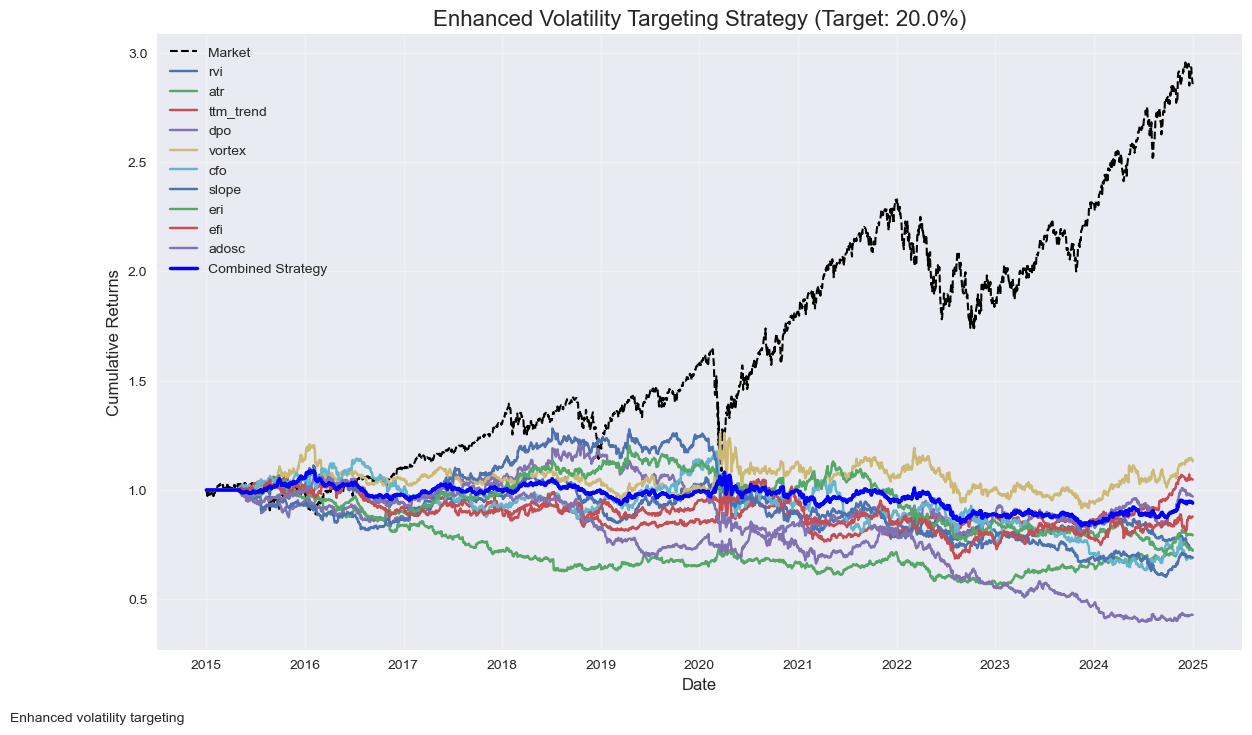

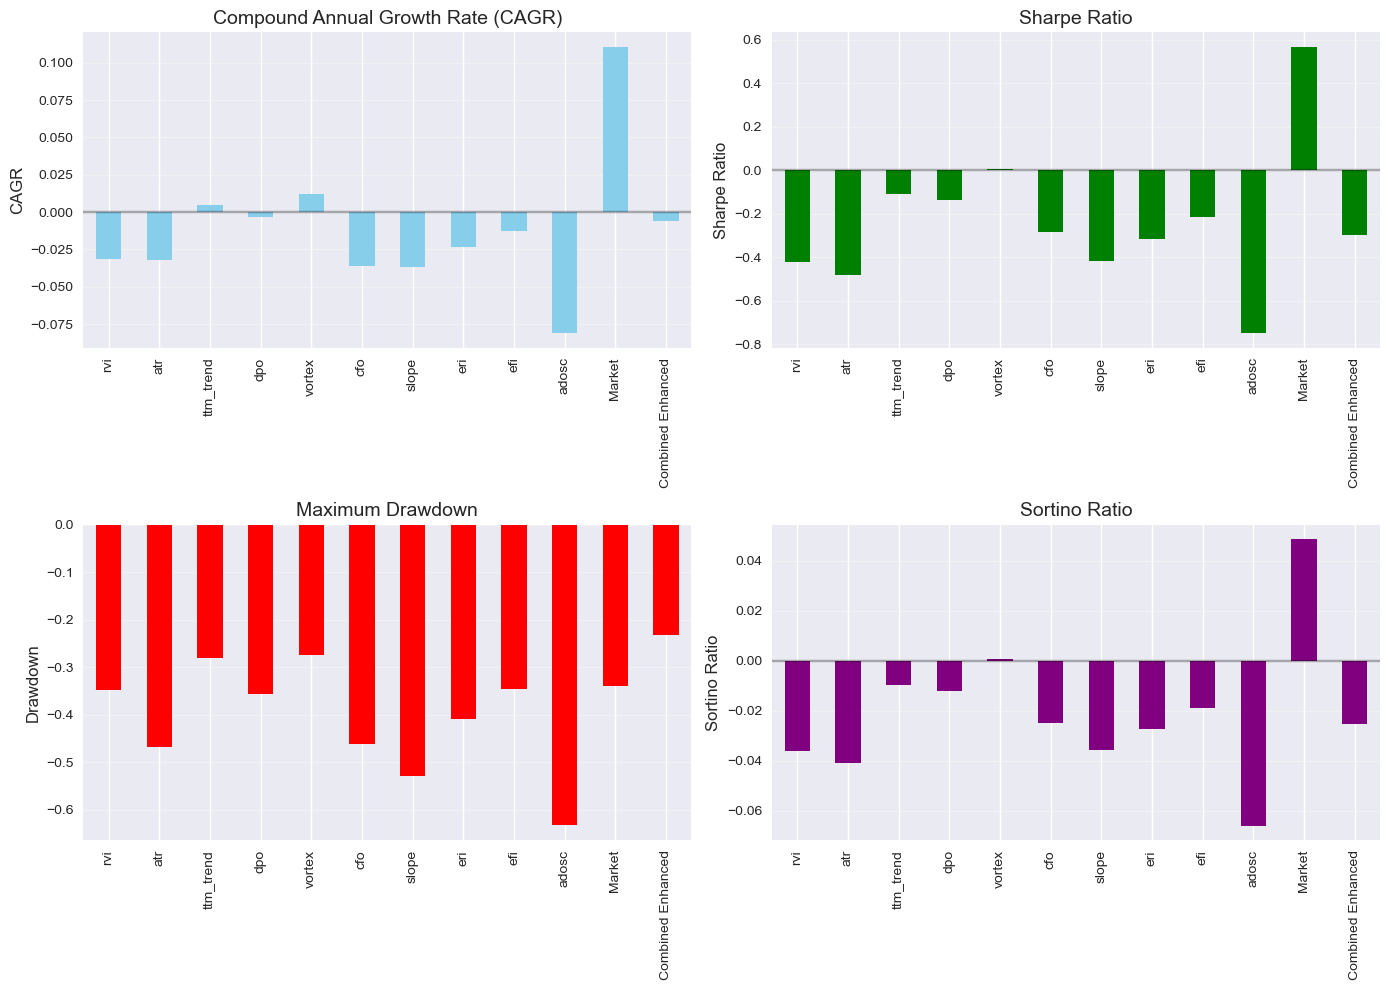

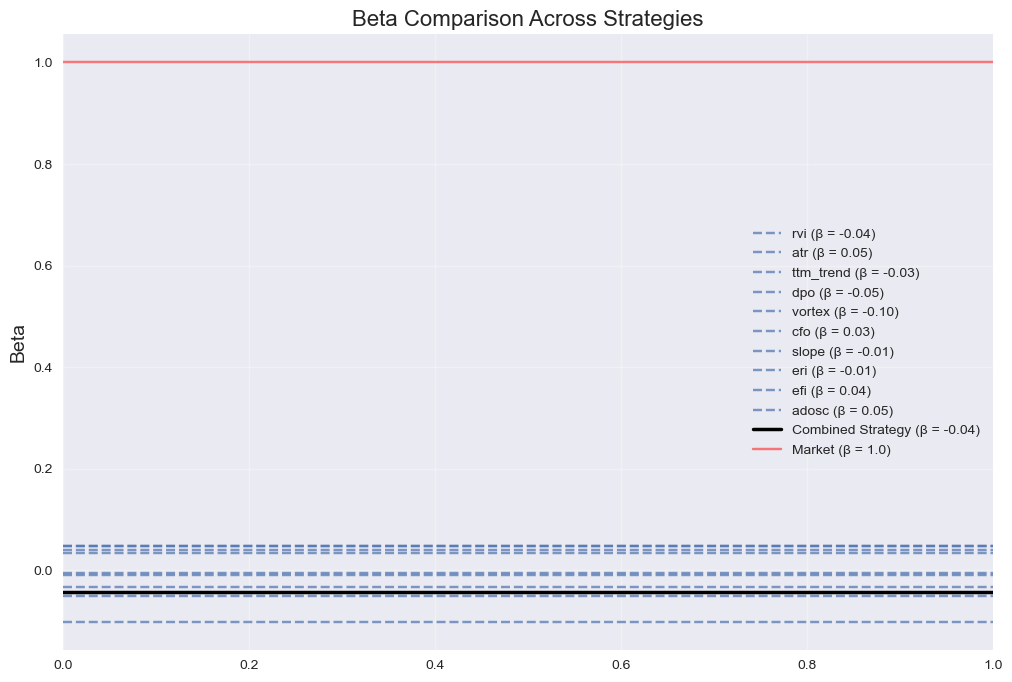

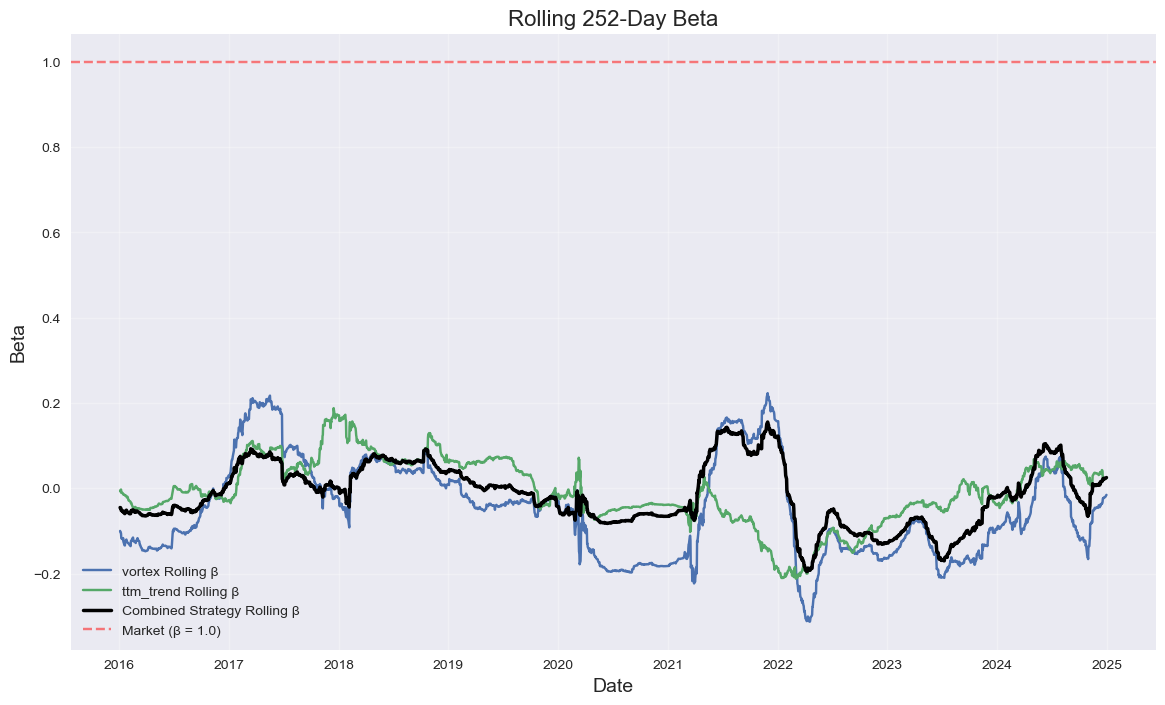

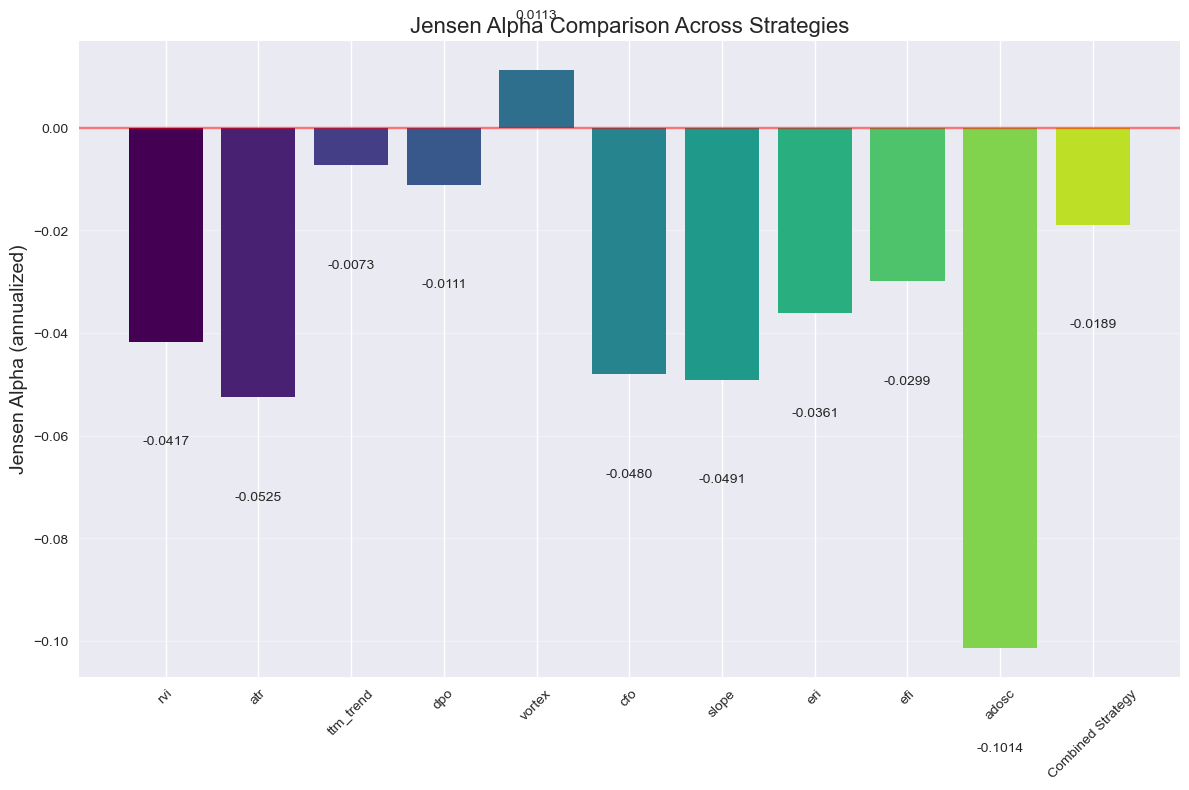

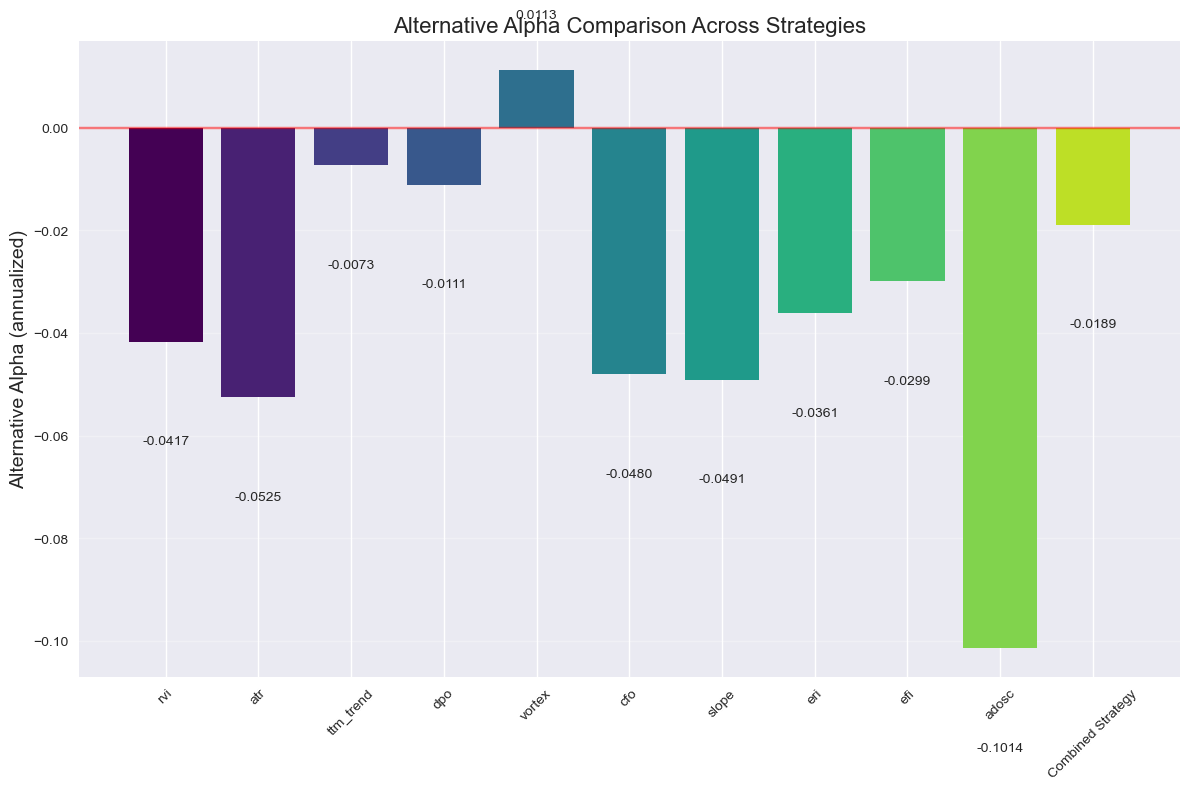


Performance Metrics Summary:
                       CAGR  Sharpe Ratio  Sortino Ratio  Max Drawdown  \
rvi               -0.031704     -0.419853      -0.036145     -0.348291   
atr               -0.032065     -0.483302      -0.040924     -0.467513   
ttm_trend          0.004669     -0.109496      -0.009946     -0.279516   
dpo               -0.003049     -0.137373      -0.011992     -0.355652   
vortex             0.012438      0.007747       0.000685     -0.273613   
cfo               -0.036386     -0.283896      -0.024770     -0.462225   
slope             -0.036502     -0.415744      -0.035884     -0.528943   
eri               -0.023064     -0.317390      -0.027306     -0.407597   
efi               -0.012889     -0.216911      -0.019119     -0.346419   
adosc             -0.081322     -0.749523      -0.066109     -0.632178   
Market             0.110858      0.567356       0.048569     -0.339250   
Combined Enhanced -0.006203     -0.296673      -0.025458     -0.230771   

       

In [98]:
# Define the signals to test based on your results
signals_to_test = [
    'rvi',
    'atr',
    'ttm_trend',
    'dpo',
    'vortex',
    'cfo',
    'slope',
    'eri',
    'efi',
    'adosc'
]

# Number of top/bottom stocks to include in each portfolio
n_stocks = 5

# Enhanced volatility targeting parameters
target_volatility = 0.20       # 20% target volatility
volatility_window = 30         # Shorter window for volatility calculation
min_periods = 15               # Minimum periods for volatility calculation
max_leverage = 5.0             # Maximum leverage
min_leverage = 0.5             # Minimum leverage
long_leverage = 4.0            # Long leverage
short_leverage = 1.5           # Short leverage

# Run the enhanced backtest
enhanced_results = run_enhanced_backtest(
    combined_df,
    returns_df,
    market_returns,
    signals_to_test,
    n_stocks=n_stocks,
    rebalance_freq='M',        # Monthly rebalancing
    target_volatility=target_volatility,
    volatility_window=volatility_window,
    min_periods=min_periods,
    max_leverage=max_leverage,
    min_leverage=min_leverage,
    long_leverage=long_leverage,
    short_leverage=short_leverage
)

## Portfolio Construction: Simple Ranking

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def calculate_beta_and_alpha(strategy_returns, market_returns, risk_free_rate=0.02/252):
    """
    Calculate beta and Jensen's alpha for a strategy.
    
    Parameters:
    strategy_returns: Series with strategy returns
    market_returns: Series with market returns
    risk_free_rate: Daily risk-free rate (default: 2% annual / 252 trading days)
    
    Returns:
    Dictionary with beta and alpha values
    """
    # Filter out NaN values and ensure same dates for both series
    common_idx = strategy_returns.index.intersection(market_returns.index)
    strategy_returns = strategy_returns.loc[common_idx]
    market_returns = market_returns.loc[common_idx]
    
    # Calculate excess returns
    excess_strategy = strategy_returns - risk_free_rate
    excess_market = market_returns - risk_free_rate
    
    # Calculate beta using covariance and variance
    beta = np.cov(excess_strategy, excess_market)[0, 1] / np.var(excess_market)
    
    # Calculate Jensen's alpha using CAPM formula
    # α = r_i - [r_f + β(r_m - r_f)]
    expected_return = risk_free_rate + beta * (market_returns.mean() - risk_free_rate)
    alpha = strategy_returns.mean() - expected_return
    
    # Annualize alpha (assuming daily returns)
    alpha_annual = alpha * 252
    
    return {
        'beta': beta,
        'alpha': alpha_annual
    }

def calculate_alternative_alpha(strategy_returns, market_returns, beta, risk_free_rate=0.02/252):
    """
    Calculate alpha using the formula: α_i = r_i - β_i,bm * r_bm - (1 - β_i,bm) * rf
    
    Parameters:
    strategy_returns: Series with strategy returns
    market_returns: Series with market returns
    beta: Beta of the strategy relative to the market
    risk_free_rate: Daily risk-free rate (default: 2% annual / 252 trading days)
    
    Returns:
    Annualized alpha value
    """
    # Calculate alpha using the provided formula
    alpha = strategy_returns.mean() - (beta * market_returns.mean() + (1 - beta) * risk_free_rate)
    
    # Annualize alpha (assuming daily returns)
    alpha_annual = alpha * 252
    
    return alpha_annual

def calculate_performance_metrics(returns_series, risk_free_rate=0.02/252):
    """
    Calculate key performance metrics for a returns series.
    
    Parameters:
    returns_series: Series with daily returns
    risk_free_rate: Daily risk-free rate (default: 2% annual / 252 trading days)
    
    Returns:
    Dictionary with performance metrics
    """
    # Convert to numpy array for calculations
    returns = returns_series.dropna().values
    
    if len(returns) == 0:
        return {
            'Total Return': 0,
            'CAGR': 0,
            'Sharpe Ratio': 0,
            'Max Drawdown': 0,
            'Volatility': 0,
            'Information Ratio': None,
            'Beta': None,
            'Jensen Alpha': None,
            'Alternative Alpha': None
        }
    
    # Calculate metrics
    total_return = (1 + returns).prod() - 1
    
    # Annualized metrics (assuming 252 trading days)
    trading_days = 252
    n_years = len(returns) / trading_days
    
    # Compound Annual Growth Rate
    cagr = (1 + total_return) ** (1 / n_years) - 1
    
    # Calculate daily excess returns
    excess_returns = returns - risk_free_rate
    
    # Annualized Sharpe Ratio
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(trading_days)
    
    # Maximum Drawdown
    cumulative_returns = (1 + pd.Series(returns)).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / running_max) - 1
    max_drawdown = drawdown.min()
    
    # Volatility (annualized)
    volatility = np.std(returns) * np.sqrt(trading_days)
    
    # Store all metrics
    metrics = {
        'Total Return': total_return,
        'CAGR': cagr,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Volatility': volatility,
        'Information Ratio': None,  # Will be filled in later
        'Beta': None,               # Will be filled in later
        'Jensen Alpha': None,       # Will be filled in later
        'Alternative Alpha': None   # Will be filled in later
    }
    
    return metrics

def backtest_signal_portfolio(combined_df, returns_df, market_returns_df, 
                             signal_name, n_stocks=5, rebalance_freq='M', 
                             lookback_window=1, long_leverage=1.0, short_leverage=1.0):
    """
    Backtest a long-short portfolio strategy based on a single technical indicator.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)
    market_returns_df: DataFrame with market returns
    signal_name: Name of the signal to use for ranking
    n_stocks: Number of top/bottom stocks to include in the portfolio
    rebalance_freq: Rebalancing frequency ('M' for monthly, 'W' for weekly)
    lookback_window: Number of periods to look back for signal stability
    long_leverage: Leverage for long positions
    short_leverage: Leverage for short positions
    
    Returns:
    Dictionary with portfolio returns and performance metrics
    """
    print(f"Backtesting portfolio for signal: {signal_name}")
    
    # Get unique tickers that have this signal
    available_tickers = []
    for ticker in combined_df.columns.get_level_values('ticker').unique():
        try:
            # Check if this ticker has the signal
            combined_df.xs((ticker, signal_name), axis=1)
            available_tickers.append(ticker)
        except:
            continue
    
    print(f"Found {len(available_tickers)} tickers with signal {signal_name}")
    
    # Create a pivoted dataframe for this signal
    signal_values = pd.DataFrame()
    
    for ticker in available_tickers:
        try:
            # Extract signal values for this ticker
            ticker_signal = combined_df.xs((ticker, signal_name), axis=1)
            signal_values[ticker] = ticker_signal
        except Exception as e:
            continue
    
    # Create a pivoted dataframe for returns
    stock_returns = pd.DataFrame()
    
    for ticker in available_tickers:
        try:
            # Extract returns for this ticker
            ticker_returns = returns_df.xs(ticker, axis=1, level='ticker')
            stock_returns[ticker] = ticker_returns.iloc[:, 0]
        except Exception as e:
            continue
    
    # Get tickers that have both signals and returns
    common_tickers = list(set(signal_values.columns) & set(stock_returns.columns))
    print(f"Found {len(common_tickers)} tickers with both signal and returns data")
    
    # Keep only tickers with both signal and returns
    signal_values = signal_values[common_tickers]
    stock_returns = stock_returns[common_tickers]
    
    # Define rebalancing dates based on frequency
    if rebalance_freq == 'M':
        rebalance_dates = pd.date_range(start=signal_values.index[0], 
                                        end=signal_values.index[-1], 
                                        freq='M')
    elif rebalance_freq == 'W':
        rebalance_dates = pd.date_range(start=signal_values.index[0], 
                                        end=signal_values.index[-1], 
                                        freq='W-FRI')
    else:
        raise ValueError("Rebalance frequency must be 'M' or 'W'")
    
    # Filter to dates that exist in our data
    rebalance_dates = [date for date in rebalance_dates if date in signal_values.index]
    
    # Initialize portfolio returns
    portfolio_returns = pd.Series(index=stock_returns.index, dtype=float)
    
    # Keep track of positions for analysis
    positions_history = {}
    
    # For each rebalancing date
    for i, rebalance_date in enumerate(rebalance_dates):
        if i == len(rebalance_dates) - 1:
            # Skip the last rebalance date (no future returns to calculate)
            continue
            
        next_rebalance_date = rebalance_dates[i + 1]
        
        # Get signal values for current rebalance date
        current_signals = signal_values.loc[rebalance_date].dropna()
        
        # If we don't have enough signals, skip this period
        if len(current_signals) < 2 * n_stocks:
            continue
            
        # Rank stocks by signal value
        ranked_stocks = current_signals.sort_values(ascending=False)
        
        # Get top and bottom n stocks
        top_stocks = ranked_stocks.index[:n_stocks]
        bottom_stocks = ranked_stocks.index[-n_stocks:]
        
        # Store positions for this rebalancing period
        positions = {
            'date': rebalance_date,
            'long_stocks': list(top_stocks),
            'short_stocks': list(bottom_stocks)
        }
        positions_history[rebalance_date] = positions
        
        # Get returns for portfolio stocks during this period
        period_mask = (stock_returns.index > rebalance_date) & (stock_returns.index <= next_rebalance_date)
        period_returns = stock_returns.loc[period_mask]
        
        # Skip if no returns in this period
        if period_returns.empty:
            continue
            
        # Calculate portfolio returns (long top stocks, short bottom stocks)
        for date in period_returns.index:
            date_returns = period_returns.loc[date]
            
            # Long returns (equal weight)
            if len(top_stocks) > 0:
                top_returns = date_returns[top_stocks].mean()
            else:
                top_returns = 0
                
            # Short returns (equal weight)
            if len(bottom_stocks) > 0:
                bottom_returns = -date_returns[bottom_stocks].mean()
            else:
                bottom_returns = 0
                
            # Combined long-short returns with leverage
            # Default is equal weight (1:1), but can be adjusted with leverage parameters
            portfolio_returns.loc[date] = (top_returns * long_leverage + bottom_returns * short_leverage) / (long_leverage + short_leverage)
    
    # Fill NaN values in portfolio returns with 0
    portfolio_returns = portfolio_returns.fillna(0)
    
    # Calculate cumulative returns
    portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
    
    # Get market returns for the same period
    market_returns = market_returns_df.loc[portfolio_returns.index]
    market_cumulative_returns = (1 + market_returns['Market_Returns']).cumprod()
    
    # Calculate rolling beta (e.g., 252 trading days ~ 1 year)
    rolling_window = 252
    rolling_beta = pd.Series(index=portfolio_returns.index)
    
    for i in range(rolling_window, len(portfolio_returns)):
        window_start = i - rolling_window
        window_end = i
        
        strategy_window = portfolio_returns.iloc[window_start:window_end]
        market_window = market_returns['Market_Returns'].iloc[window_start:window_end]
        
        # Calculate beta for this window
        if len(strategy_window) > 0 and len(market_window) > 0:
            cov = np.cov(strategy_window, market_window)[0, 1]
            var = np.var(market_window)
            
            if var > 0:
                rolling_beta.iloc[i] = cov / var
    
    # Calculate overall beta and alpha
    risk_free_rate = 0.02/252  # Daily risk-free rate (2% annual)
    
    # Calculate Jensen's alpha (CAPM-based)
    jensens_metrics = calculate_beta_and_alpha(portfolio_returns, market_returns['Market_Returns'], risk_free_rate)
    beta = jensens_metrics['beta']
    jensens_alpha = jensens_metrics['alpha']
    
    # Calculate alternative alpha using the provided formula
    alt_alpha = calculate_alternative_alpha(portfolio_returns, market_returns['Market_Returns'], beta, risk_free_rate)
    
    # Calculate performance metrics
    portfolio_metrics = calculate_performance_metrics(portfolio_returns)
    market_metrics = calculate_performance_metrics(market_returns['Market_Returns'])
    
    # Add beta and alpha values to metrics
    portfolio_metrics['Beta'] = beta
    portfolio_metrics['Jensen Alpha'] = jensens_alpha
    portfolio_metrics['Alternative Alpha'] = alt_alpha
    
    # Calculate Information Ratio
    excess_returns = portfolio_returns - market_returns['Market_Returns']
    if np.std(excess_returns) > 0:
        information_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)
    else:
        information_ratio = 0
    portfolio_metrics['Information Ratio'] = information_ratio
    
    # Return results
    results = {
        'signal': signal_name,
        'portfolio_returns': portfolio_returns,
        'portfolio_cumulative_returns': portfolio_cumulative_returns,
        'market_returns': market_returns['Market_Returns'],
        'market_cumulative_returns': market_cumulative_returns,
        'portfolio_metrics': portfolio_metrics,
        'market_metrics': market_metrics,
        'positions_history': positions_history,
        'rolling_beta': rolling_beta
    }
    
    return results

def backtest_multiple_signals(combined_df, returns_df, market_returns_df, 
                             signals_list, n_stocks=5, rebalance_freq='M',
                             long_leverage=1.0, short_leverage=1.0):
    """
    Backtest portfolios for multiple signals and compare performance.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)
    market_returns_df: DataFrame with market returns
    signals_list: List of signal names to test
    n_stocks: Number of top/bottom stocks to include in each portfolio
    rebalance_freq: Rebalancing frequency ('M' for monthly, 'W' for weekly)
    long_leverage: Leverage for long positions
    short_leverage: Leverage for short positions
    
    Returns:
    Dictionary with results for all signals
    """
    # Initialize results storage
    all_results = {}
    metrics_summary = pd.DataFrame()
    
    # Backtest each signal
    for signal in signals_list:
        try:
            results = backtest_signal_portfolio(
                combined_df, 
                returns_df, 
                market_returns_df, 
                signal, 
                n_stocks=n_stocks, 
                rebalance_freq=rebalance_freq,
                long_leverage=long_leverage,
                short_leverage=short_leverage
            )
            
            all_results[signal] = results
            
            # Add metrics to summary dataframe
            signal_metrics = pd.Series(results['portfolio_metrics'], name=signal)
            metrics_summary = pd.concat([metrics_summary, signal_metrics.to_frame().T])
            
            print(f"Completed backtest for {signal}")
        except Exception as e:
            print(f"Error backtesting {signal}: {e}")
    
    # Add market metrics to summary
    if all_results:
        market_metrics = pd.Series(all_results[list(all_results.keys())[0]]['market_metrics'], name='Market')
        metrics_summary = pd.concat([metrics_summary, market_metrics.to_frame().T])
    
    # Return all results
    return {
        'individual_results': all_results,
        'metrics_summary': metrics_summary
    }

def create_combined_strategy(all_results, signals_list, 
                           weighting_method='equal'):
    """
    Create a combined strategy from multiple signal portfolios.
    
    Parameters:
    all_results: Dictionary with results for all signals
    signals_list: List of signal names to include
    weighting_method: Method for weighting signals ('equal', 'sharpe', 'information')
    
    Returns:
    Dictionary with combined strategy results
    """
    print(f"Creating combined strategy using {weighting_method} weighting")
    
    # Get common date range for all portfolios
    common_dates = None
    
    for signal in signals_list:
        if signal not in all_results['individual_results']:
            continue
            
        signal_returns = all_results['individual_results'][signal]['portfolio_returns']
        
        if common_dates is None:
            common_dates = set(signal_returns.index)
        else:
            common_dates = common_dates.intersection(set(signal_returns.index))
    
    common_dates = sorted(list(common_dates))
    
    # Initialize combined returns
    combined_returns = pd.Series(0, index=common_dates)
    
    # Calculate weights based on selected method
    if weighting_method == 'equal':
        # Equal weighting for all signals
        weights = {signal: 1/len(signals_list) for signal in signals_list 
                  if signal in all_results['individual_results']}
    
    elif weighting_method == 'sharpe':
        # Weight by Sharpe Ratio
        metrics = all_results['metrics_summary']
        sharpe_values = metrics.loc[signals_list, 'Sharpe Ratio']
        
        # Handle negative Sharpe ratios by setting to small positive number
        sharpe_values = sharpe_values.apply(lambda x: max(x, 0.0001))
        
        total_sharpe = sharpe_values.sum()
        weights = {signal: sharpe_values[signal]/total_sharpe for signal in signals_list 
                  if signal in all_results['individual_results']}
    
    elif weighting_method == 'information':
        # Weight by Information Ratio
        metrics = all_results['metrics_summary']
        ir_values = metrics.loc[signals_list, 'Information Ratio']
        
        # Handle negative IRs by setting to small positive number
        ir_values = ir_values.apply(lambda x: max(x, 0.0001))
        
        total_ir = ir_values.sum()
        weights = {signal: ir_values[signal]/total_ir for signal in signals_list 
                  if signal in all_results['individual_results']}
    
    # Apply weights to each signal's returns
    for signal, weight in weights.items():
        signal_returns = all_results['individual_results'][signal]['portfolio_returns']
        signal_returns = signal_returns.reindex(common_dates)
        combined_returns += signal_returns * weight
    
    # Calculate cumulative returns
    combined_cumulative_returns = (1 + combined_returns).cumprod()
    
    # Get market returns for the same period
    market_returns = all_results['individual_results'][list(all_results['individual_results'].keys())[0]]['market_returns']
    market_returns = market_returns.reindex(common_dates)
    market_cumulative_returns = (1 + market_returns).cumprod()
    
    # Calculate beta and alpha for combined strategy
    risk_free_rate = 0.02/252  # Daily risk-free rate (2% annual)
    jensens_metrics = calculate_beta_and_alpha(combined_returns, market_returns, risk_free_rate)
    beta = jensens_metrics['beta']
    jensens_alpha = jensens_metrics['alpha']
    
    # Calculate alternative alpha
    alt_alpha = calculate_alternative_alpha(combined_returns, market_returns, beta, risk_free_rate)
    
    # Calculate rolling beta
    rolling_window = 252  # 1 year window
    rolling_beta = pd.Series(index=combined_returns.index)
    
    for i in range(rolling_window, len(combined_returns)):
        window_start = i - rolling_window
        window_end = i
        
        strategy_window = combined_returns.iloc[window_start:window_end]
        market_window = market_returns.iloc[window_start:window_end]
        
        # Calculate beta for this window
        if len(strategy_window) > 0 and len(market_window) > 0:
            cov = np.cov(strategy_window, market_window)[0, 1]
            var = np.var(market_window)
            
            if var > 0:
                rolling_beta.iloc[i] = cov / var
    
    # Calculate performance metrics
    combined_metrics = calculate_performance_metrics(combined_returns)
    
    # Add beta and alpha to metrics
    combined_metrics['Beta'] = beta
    combined_metrics['Jensen Alpha'] = jensens_alpha
    combined_metrics['Alternative Alpha'] = alt_alpha
    
    # Calculate Information Ratio
    excess_returns = combined_returns - market_returns
    if np.std(excess_returns) > 0:
        information_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)
    else:
        information_ratio = 0
    combined_metrics['Information Ratio'] = information_ratio
    
    # Return results
    combined_results = {
        'combined_returns': combined_returns,
        'combined_cumulative_returns': combined_cumulative_returns,
        'market_returns': market_returns,
        'market_cumulative_returns': market_cumulative_returns,
        'combined_metrics': combined_metrics,
        'weights': weights,
        'rolling_beta': rolling_beta
    }
    
    return combined_results

def plot_strategy_performance(backtest_results, combined_strategy=None, 
                            title="Portfolio Performance", 
                            save_path=None):
    """
    Plot performance of backtest strategies and benchmark.
    
    Parameters:
    backtest_results: Results from backtest_multiple_signals
    combined_strategy: Optional results from combined strategy
    title: Plot title
    save_path: Optional path to save the plot
    """
    plt.figure(figsize=(14, 8))
    
    # Plot individual signals
    first_signal = True
    legend_elements = []
    
    for signal, results in backtest_results['individual_results'].items():
        # Plot cumulative returns
        if first_signal:
            # Only plot market returns once
            plt.plot(results['market_cumulative_returns'], 
                    linestyle='--', color='black', linewidth=1.5)
            legend_elements.append(f"Market")
            first_signal = False
        
        plt.plot(results['portfolio_cumulative_returns'])
        legend_elements.append(f"{signal}")
    
    # Plot combined strategy if provided
    if combined_strategy is not None:
        plt.plot(combined_strategy['combined_cumulative_returns'], 
                linewidth=2.5, color='blue')
        legend_elements.append("Combined Strategy")
    
    plt.legend(legend_elements)
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative Returns', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_metrics_comparison(backtest_results, combined_strategy=None,
                          save_path=None):
    """
    Create bar charts comparing key metrics across strategies.
    
    Parameters:
    backtest_results: Results from backtest_multiple_signals
    combined_strategy: Optional results from combined strategy
    save_path: Optional path to save the plot
    """
    metrics = backtest_results['metrics_summary'].copy()
    
    # Add combined strategy if provided
    if combined_strategy is not None:
        combined_metrics = pd.Series(combined_strategy['combined_metrics'], 
                                    name='Combined')
        metrics = pd.concat([metrics, combined_metrics.to_frame().T])
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Plot CAGR
    metrics['CAGR'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Compound Annual Growth Rate (CAGR)', fontsize=14)
    axes[0, 0].set_ylabel('CAGR', fontsize=12)
    axes[0, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Plot Sharpe Ratio
    metrics['Sharpe Ratio'].plot(kind='bar', ax=axes[0, 1], color='green')
    axes[0, 1].set_title('Sharpe Ratio', fontsize=14)
    axes[0, 1].set_ylabel('Sharpe Ratio', fontsize=12)
    axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Plot Maximum Drawdown
    metrics['Max Drawdown'].plot(kind='bar', ax=axes[0, 2], color='red')
    axes[0, 2].set_title('Maximum Drawdown', fontsize=14)
    axes[0, 2].set_ylabel('Drawdown', fontsize=12)
    axes[0, 2].grid(axis='y', alpha=0.3)
    
    # Plot Information Ratio
    metrics['Information Ratio'].plot(kind='bar', ax=axes[1, 0], color='purple')
    axes[1, 0].set_title('Information Ratio vs. Market', fontsize=14)
    axes[1, 0].set_ylabel('Information Ratio', fontsize=12)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Plot Beta
    metrics['Beta'].plot(kind='bar', ax=axes[1, 1], color='orange')
    axes[1, 1].set_title('Beta', fontsize=14)
    axes[1, 1].set_ylabel('Beta', fontsize=12)
    axes[1, 1].axhline(y=1, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    # Plot Jensen's Alpha
    metrics['Jensen Alpha'].plot(kind='bar', ax=axes[1, 2], color='teal')
    axes[1, 2].set_title('Jensen\'s Alpha (Annualized)', fontsize=14)
    axes[1, 2].set_ylabel('Alpha', fontsize=12)
    axes[1, 2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return metrics

def plot_beta_comparison(backtest_results, combined_strategy=None, 
                       save_path="beta_comparison.png"):
    """
    Plot beta comparison for different strategies.
    
    Parameters:
    backtest_results: Results from backtest_multiple_signals
    combined_strategy: Optional results from combined strategy
    save_path: Path to save the figure
    """
    plt.figure(figsize=(12, 8))
    
    # Get beta values
    beta_values = []
    labels = []
    
    for signal, results in backtest_results['individual_results'].items():
        if 'Beta' in results['portfolio_metrics']:
            beta_values.append(results['portfolio_metrics']['Beta'])
            labels.append(signal)
    
    # Add combined strategy if provided
    if combined_strategy is not None and 'Beta' in combined_strategy['combined_metrics']:
        beta_values.append(combined_strategy['combined_metrics']['Beta'])
        labels.append('Combined Strategy')
        
    # Create colored bars
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(beta_values)))
    plt.bar(labels, beta_values, color=colors)
    
    # Add reference line for market beta = 1
    plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
    
    # Add beta values as text on top of bars
    for i, v in enumerate(beta_values):
        plt.text(i, v + 0.05, f'{v:.2f}', ha='center')
    
    plt.ylabel('Beta', fontsize=14)
    plt.title('Beta Comparison Across Strategies', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_rolling_beta(backtest_results, signal_list=None, combined_strategy=None,
                    rolling_window=252, save_path="rolling_beta.png"):
    """
    Plot rolling beta for selected strategies.
    
    Parameters:
    backtest_results: Results from backtest_multiple_signals
    signal_list: List of signals to plot (default: None, plots all signals)
    combined_strategy: Optional results from combined strategy
    rolling_window: Window size for rolling beta calculation
    save_path: Path to save the figure
    """
    plt.figure(figsize=(14, 8))
    
    # If no signal list is provided, use all signals
    if signal_list is None:
        signal_list = list(backtest_results['individual_results'].keys())
    
    # Limit to a reasonable number of signals to avoid cluttered plot
    if len(signal_list) > 5:
        signal_list = signal_list[:5]
    
    # Plot rolling beta for selected signals
    for signal in signal_list:
        if signal in backtest_results['individual_results']:
            results = backtest_results['individual_results'][signal]
            if 'rolling_beta' in results:
                rolling_beta = results['rolling_beta'].dropna()
                plt.plot(rolling_beta, label=f"{signal} Rolling β")
    
    # Plot rolling beta for combined strategy if provided
    if combined_strategy is not None and 'rolling_beta' in combined_strategy:
        rolling_beta = combined_strategy['rolling_beta'].dropna()
        plt.plot(rolling_beta, linewidth=2.5, color='black', label="Combined Strategy Rolling β")
    
    # Add beta = 1 reference line
    plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Market (β = 1.0)')
    
    plt.legend(loc='best')
    plt.title(f'Rolling {rolling_window}-Day Beta', fontsize=16)
    plt.ylabel('Beta', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_alpha_comparison(backtest_results, combined_strategy=None, 
                        alpha_type='Jensen Alpha', save_path="alpha_comparison.png"):
    """
    Plot alpha comparison for different strategies.
    
    Parameters:
    backtest_results: Results from backtest_multiple_signals
    combined_strategy: Optional results from combined strategy
    alpha_type: Type of alpha to plot ('Jensen Alpha' or 'Alternative Alpha')
    save_path: Path to save the figure
    """
    plt.figure(figsize=(12, 8))
    
    # Get alpha values for all strategies
    alpha_values = []
    labels = []
    
    for signal, results in backtest_results['individual_results'].items():
        if alpha_type in results['portfolio_metrics']:
            alpha_values.append(results['portfolio_metrics'][alpha_type])
            labels.append(signal)
    
    # Add combined strategy if provided
    if combined_strategy is not None and alpha_type in combined_strategy['combined_metrics']:
        alpha_values.append(combined_strategy['combined_metrics'][alpha_type])
        labels.append('Combined Strategy')
    
    # Create bar chart
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(alpha_values)))
    plt.bar(labels, alpha_values, color=colors)
    
    # Add zero line
    plt.axhline(y=0, color='red', linestyle='-', alpha=0.5)
    
    # Add labels and title
    plt.ylabel(f'{alpha_type} (annualized)', fontsize=14)
    plt.title(f'{alpha_type} Comparison Across Strategies', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Add alpha values as text on top of bars
    for i, v in enumerate(alpha_values):
        plt.text(i, v + (0.01 if v >= 0 else -0.02), 
                f'{v:.4f}', 
                ha='center', fontsize=10)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def run_portfolio_backtest(combined_df, returns_df, market_returns_df, 
                          signals_list, n_stocks=5, rebalance_freq='M',
                          long_leverage=1.0, short_leverage=1.0):
    """
    Run complete portfolio backtest process including combined strategies.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)  
    market_returns_df: DataFrame with market returns
    signals_list: List of signal names to test
    n_stocks: Number of top/bottom stocks to include in each portfolio
    rebalance_freq: Rebalancing frequency ('M' for monthly, 'W' for weekly)
    long_leverage: Leverage for long positions
    short_leverage: Leverage for short positions
    
    Returns:
    Dictionary with all results
    """
    print(f"Starting portfolio backtest for {len(signals_list)} signals")
    print(f"Signals to test: {', '.join(signals_list)}")
    print(f"Strategy: Long top {n_stocks} / Short bottom {n_stocks} stocks per signal")
    print(f"Leverage: Long={long_leverage}x, Short={short_leverage}x")
    
    # Run backtests for individual signals
    backtest_results = backtest_multiple_signals(
        combined_df, 
        returns_df, 
        market_returns_df, 
        signals_list, 
        n_stocks=n_stocks, 
        rebalance_freq=rebalance_freq,
        long_leverage=long_leverage,
        short_leverage=short_leverage
    )
    
    # Create combined strategy with equal weights
    combined_equal = create_combined_strategy(
        backtest_results, 
        signals_list, 
        weighting_method='equal'
    )
    
    # Create combined strategy weighted by Sharpe Ratio
    combined_sharpe = create_combined_strategy(
        backtest_results, 
        signals_list, 
        weighting_method='sharpe'
    )
    
    # Create combined strategy weighted by Information Ratio
    combined_info = create_combined_strategy(
        backtest_results, 
        signals_list, 
        weighting_method='information'
    )
    
    # Plot performance comparison
    plot_strategy_performance(
        backtest_results, 
        combined_strategy=combined_sharpe,
        title=f"Portfolio Performance (Sharpe-Weighted Combination)",
        save_path="portfolio_performance_sharpe.png"
    )
    
    # Plot metrics comparison
    metrics = plot_metrics_comparison(
        backtest_results, 
        combined_strategy=combined_sharpe,
        save_path="metrics_comparison.png"
    )
    
    # Plot beta comparison
    plot_beta_comparison(
        backtest_results,
        combined_strategy=combined_sharpe,
        save_path="beta_comparison.png"
    )
    
    # Plot rolling beta for top strategies
    # Choose top signals based on Sharpe ratio
    top_signals = metrics.sort_values('Sharpe Ratio', ascending=False).index[:3]
    top_signals = [s for s in top_signals if s in signals_list]
    plot_rolling_beta(
        backtest_results,
        signal_list=top_signals,
        combined_strategy=combined_sharpe,
        save_path="rolling_beta.png"
    )
    
    # Plot Jensen's alpha comparison
    plot_alpha_comparison(
        backtest_results,
        combined_strategy=combined_sharpe,
        alpha_type='Jensen Alpha',
        save_path="jensens_alpha_comparison.png"
    )
    
    # Plot alternative alpha comparison
    plot_alpha_comparison(
        backtest_results,
        combined_strategy=combined_sharpe,
        alpha_type='Alternative Alpha',
        save_path="alternative_alpha_comparison.png"
    )
    
    print("\nPerformance Metrics Summary:")
    print(metrics[['CAGR', 'Sharpe Ratio', 'Max Drawdown', 'Beta', 'Jensen Alpha', 'Alternative Alpha', 'Information Ratio']])
    
    # Return all results
    results = {
        'individual_results': backtest_results,
        'combined_equal': combined_equal,
        'combined_sharpe': combined_sharpe,
        'combined_info': combined_info,
        'metrics_summary': metrics
    }
    
    # Save metrics to CSV
    metrics.to_csv('backtest_metrics_summary.csv')
    print("Metrics summary saved to 'backtest_metrics_summary.csv'")
    
    return results

Starting portfolio backtest...
Signals being tested: rvi, atr, ttm_trend, dpo, vortex, cfo, slope, eri, efi, adosc
Strategy: Long top 5 (leverage: 3.0x) / Short bottom 5 (leverage: 1.0x) stocks per signal
Starting portfolio backtest for 10 signals
Signals to test: rvi, atr, ttm_trend, dpo, vortex, cfo, slope, eri, efi, adosc
Strategy: Long top 5 / Short bottom 5 stocks per signal
Leverage: Long=3.0x, Short=1.0x
Backtesting portfolio for signal: rvi
Found 503 tickers with signal rvi
Found 503 tickers with both signal and returns data
Completed backtest for rvi
Backtesting portfolio for signal: atr
Found 503 tickers with signal atr
Found 503 tickers with both signal and returns data
Completed backtest for atr
Backtesting portfolio for signal: ttm_trend
Found 503 tickers with signal ttm_trend
Found 503 tickers with both signal and returns data
Completed backtest for ttm_trend
Backtesting portfolio for signal: dpo
Found 503 tickers with signal dpo
Found 503 tickers with both signal and ret

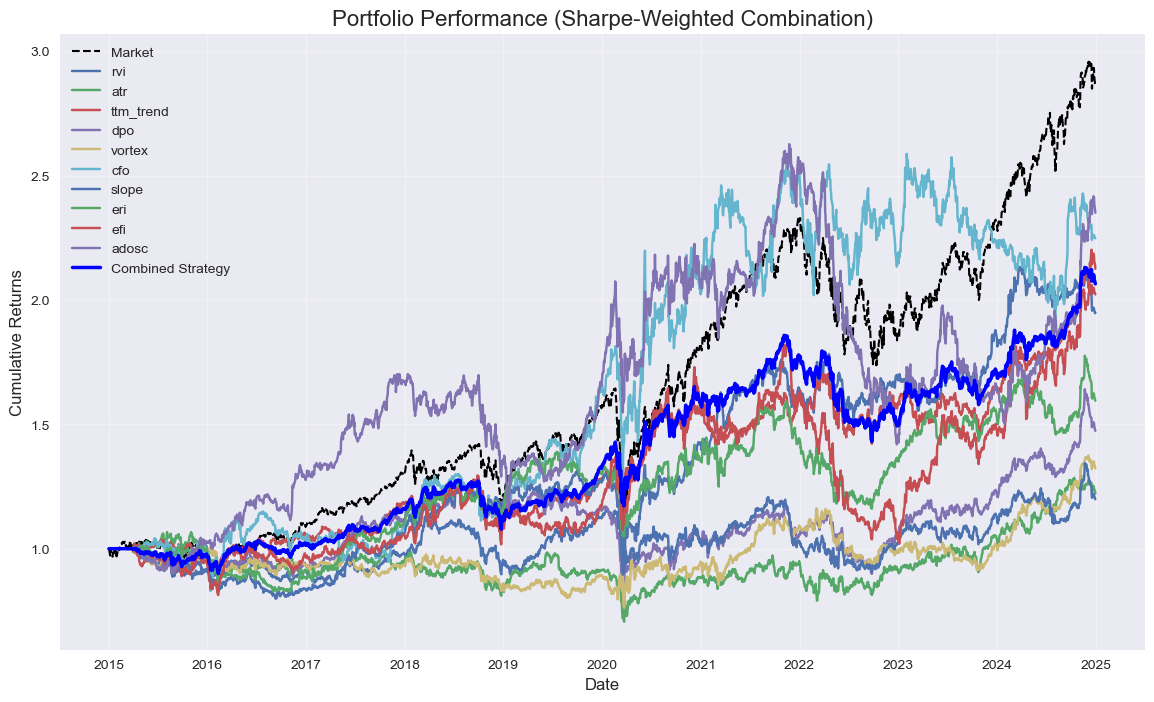

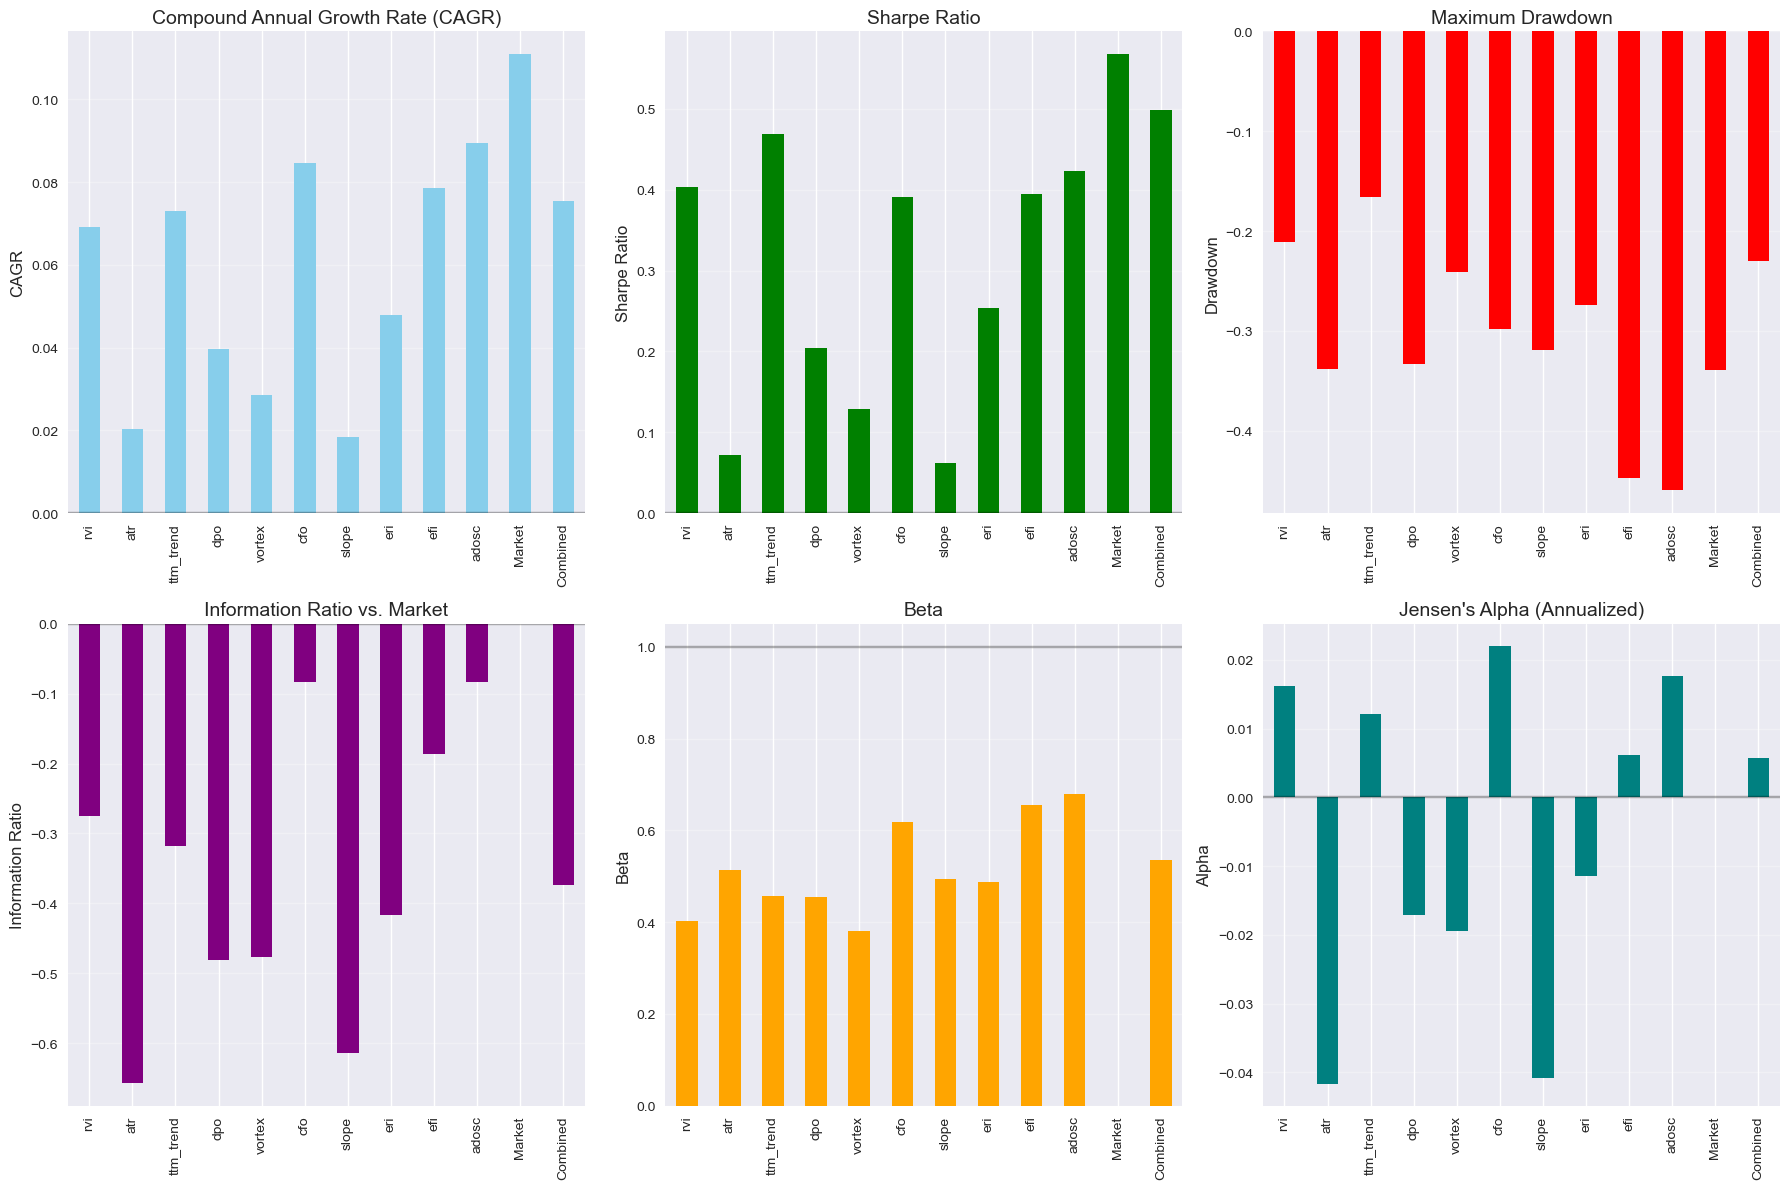

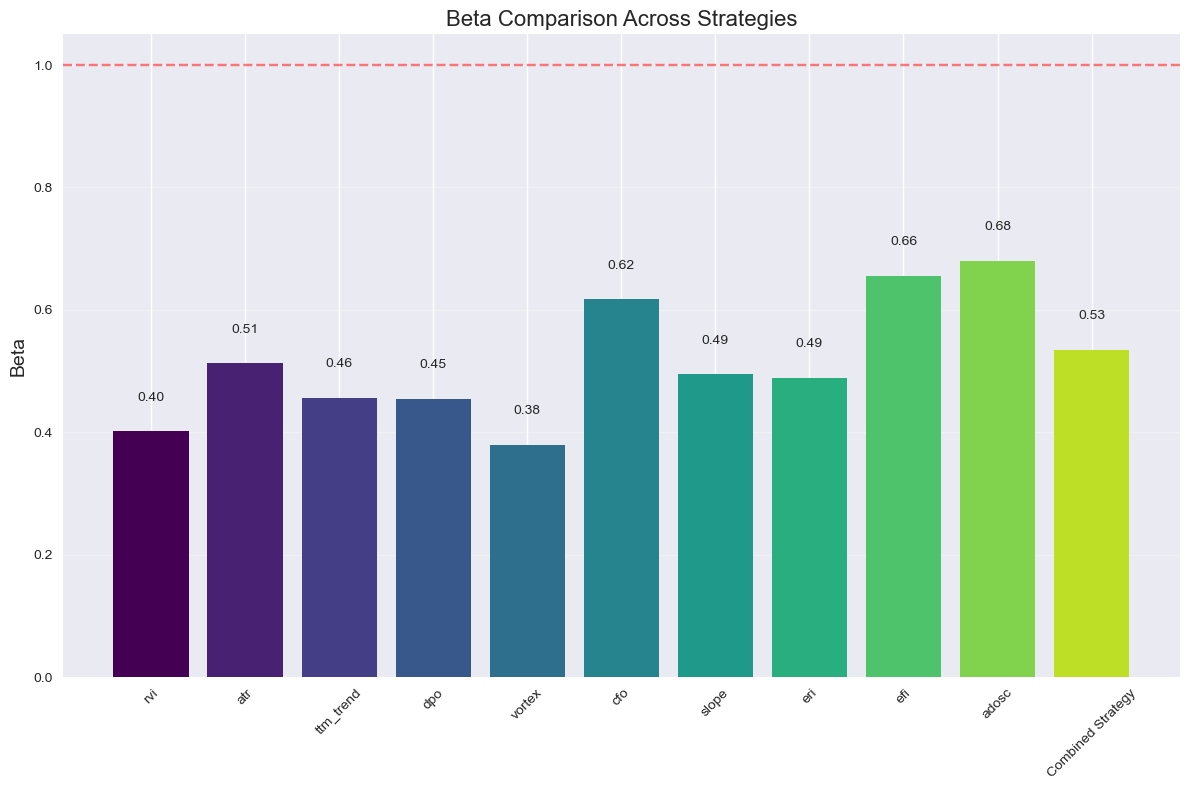

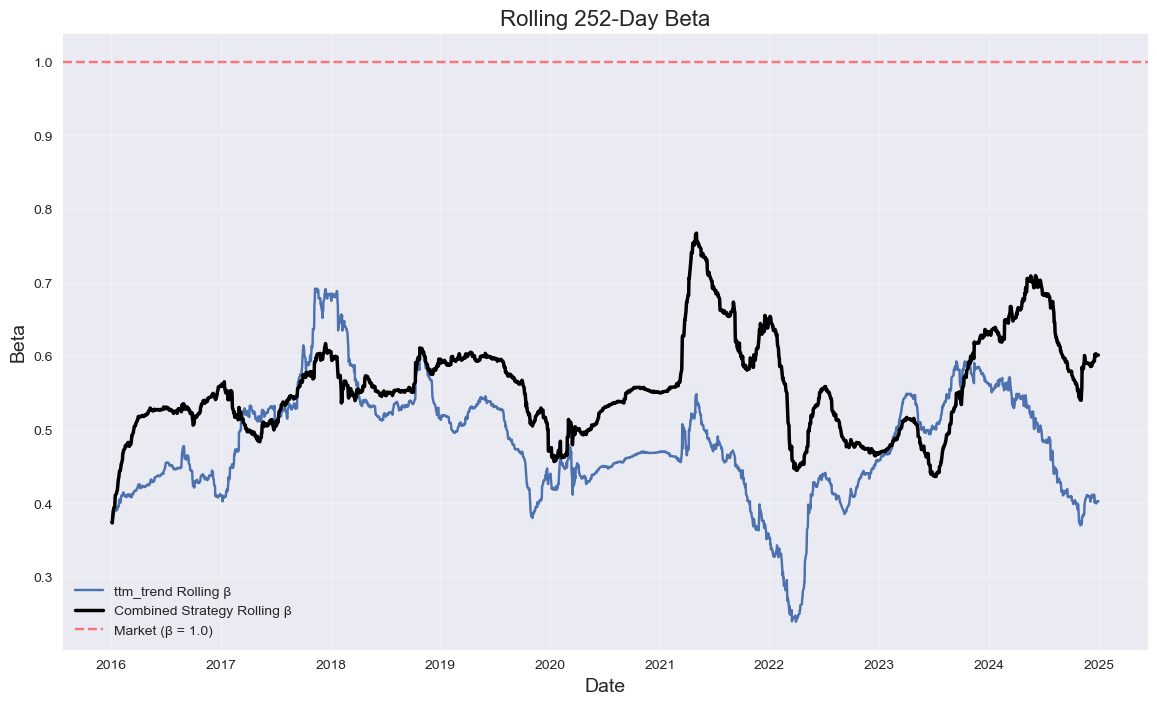

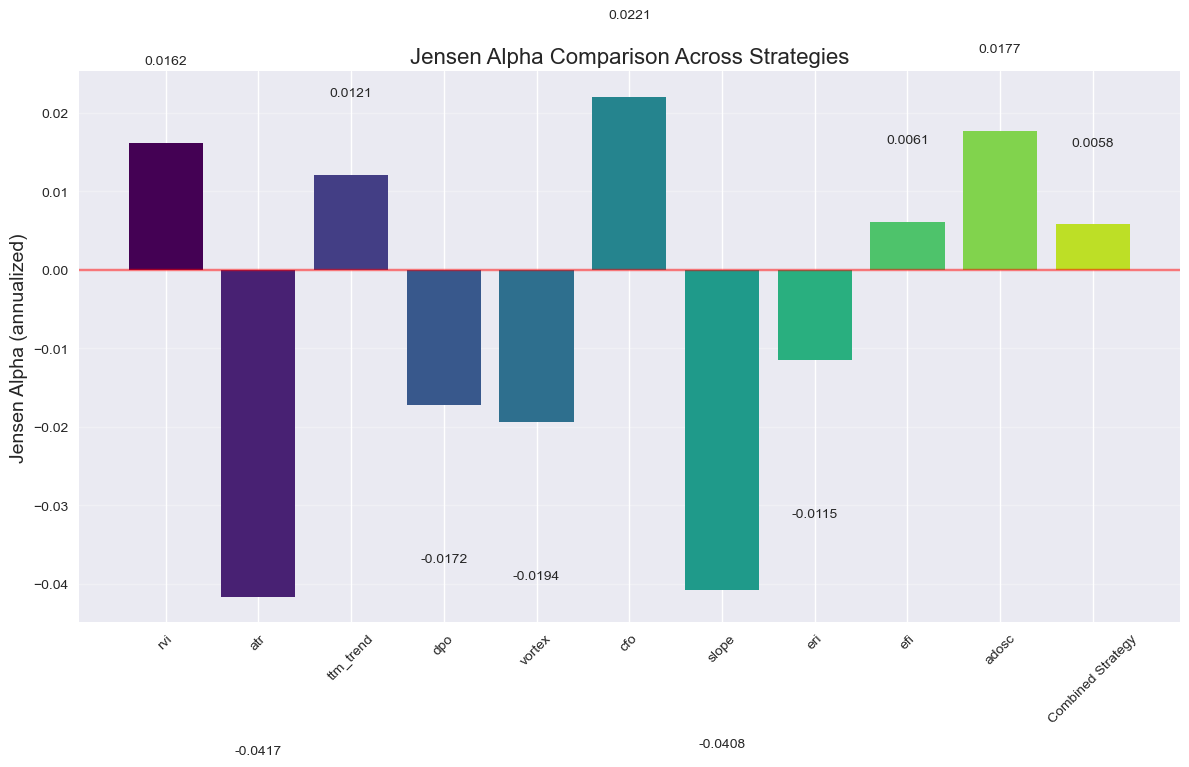

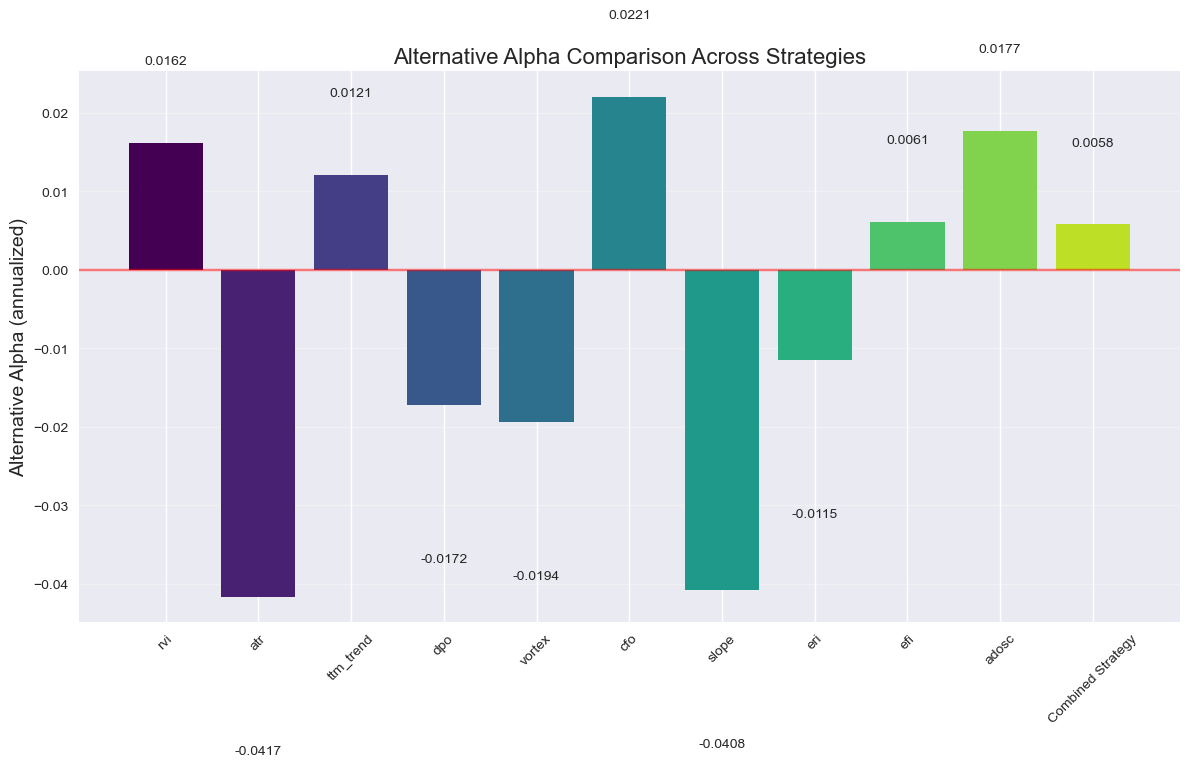


Performance Metrics Summary:
               CAGR  Sharpe Ratio  Max Drawdown      Beta  Jensen Alpha  \
rvi        0.069137      0.403141     -0.210600  0.401902      0.016153   
atr        0.020367      0.071903     -0.337959  0.512927     -0.041697   
ttm_trend  0.073086      0.468970     -0.166350  0.456353      0.012119   
dpo        0.039635      0.204777     -0.333582  0.454554     -0.017185   
vortex     0.028448      0.128422     -0.240821  0.379985     -0.019401   
cfo        0.084534      0.390840     -0.298626  0.617427      0.022074   
slope      0.018354      0.062253     -0.318949  0.494554     -0.040772   
eri        0.047872      0.254262     -0.273892  0.488574     -0.011508   
efi        0.078449      0.394513     -0.447392  0.655406      0.006123   
adosc      0.089399      0.423254     -0.459710  0.680138      0.017731   
Market     0.110858      0.567356     -0.339250       NaN           NaN   
Combined   0.075319      0.498806     -0.230018  0.534399      0.00580

In [102]:
import pandas as pd
import numpy as np

# Define the signals to test based on your results
signals_to_test = [
        'rvi',
        'atr',
        'ttm_trend',
        'dpo',
        'vortex',
        'cfo',
        'slope',
        'eri',
        'efi',
        'adosc'
    ]

# Number of top/bottom stocks to include in each portfolio
n_stocks = 5

# Set leverage for long and short positions
long_leverage = 3.0  # 2x leverage on long side
short_leverage = 1.0  # 2x leverage on short side

# Make sure your data is already loaded
# combined_df - your signals dataframe with MultiIndex columns (ticker, indicator)
# returns_df - your returns dataframe with MultiIndex columns (ticker, field)
# market_returns_df - your market returns with 'Market_Returns' column

print("Starting portfolio backtest...")
print(f"Signals being tested: {', '.join(signals_to_test)}")
print(f"Strategy: Long top {n_stocks} (leverage: {long_leverage}x) / Short bottom {n_stocks} (leverage: {short_leverage}x) stocks per signal")

# Run the complete backtest
backtest_results = run_portfolio_backtest(
    combined_df,
    returns_df,
    market_returns,
    signals_to_test,
    n_stocks=n_stocks,
    rebalance_freq='M',  # Monthly rebalancing
    long_leverage=long_leverage,
    short_leverage=short_leverage
)

print("\nBacktest Complete!")
print("The results have been saved to CSV files and performance charts have been generated.")